## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1]:
# to load and manipulate data
import pandas as pd
import numpy as np

# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns


# to split data into training and test sets
from sklearn.model_selection import train_test_split

# to build decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# to tune different models
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

# to compute classification metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    make_scorer
)

## Loading the dataset

In [2]:
df = pd.read_csv('Loan_Modelling.csv')
# Create a copy for future reference, as df can be manipulated.
_df = df

## Data Overview

### Viewing the first and last 5 rows of the dataset

In [3]:
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Checking the shape of the dataset.

In [4]:
df.shape

(5000, 14)

- The dataset has 5000 rows and 14 columns.

### Checking the attribute types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


- There are 13 numerical columns in the dataset

### Checking for missing values

In [6]:
# checking for null values
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

- There are no missing values in the dataset.

### Checking for duplicate values

In [7]:
# checking for duplicate values
df.duplicated().sum()

0

* There are no duplicate values in the data.

### Checking the statistical summary

In [8]:
df.describe(include="all")

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


* Experience columns has invalid values based on the problem context
* ID field can be dropped as, ID fields are not useful for prediction and can even harm model performance by causing overfitting.
* All the columns are defined as numeric, this could lead to some of the categorical columns treated as continious. This may affect model performance as the model might try to determine a numerical relationship.
* Categorical Columns to Convert:
  - Education: This is clearly a categorical variable with ordinal relationships (Undergrad < Graduate < Advanced/Professional). It shouldn't be treated as a continuous numerical feature.
  - Personal_Loan: This is our target variable and is binary (0: No, 1: Yes), making it categorical.
  - Securities_Account: Binary (0: No, 1: Yes) – Categorical.
  - CD_Account: Binary (0: No, 1: Yes) – Categorical.
  - Online: Binary (0: No, 1: Yes) – Categorical.
  - CreditCard: Binary (0: No, 1: Yes) – Categorical.
  - ZIPCode: Although represented as an integer, ZIP codes are categorical. They represent geographical areas and shouldn't be used in calculations as numerical values.

### Remove the 'ID' column

In [9]:
# Sample rows with -ve values for experience to determine a pattern

df.drop(['ID'], axis = 1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


### Fixing the negative values in 'experince' column

In [10]:
# Sample rows with -ve values for experience to determine a pattern

negative_experience_df = df[df['Experience'] < 0]

print(f"Number of rows with negative experience: {len(negative_experience_df)}")

print("Number of rows with negative experience by experience:\n", negative_experience_df['Experience'].value_counts())


Number of rows with negative experience: 52
Number of rows with negative experience by experience:
 -1    33
-2    15
-3     4
Name: Experience, dtype: int64


In [11]:
# Appears to be random, could be a data entry error. Lets convert them to positive
df['Experience'] = np.where(df['Experience'] < 0, abs(df['Experience']), df['Experience'])
df[df['Experience'] < 0].value_counts()

Series([], dtype: int64)

### Converting Features to Categorical

In [12]:
categorical_features = ['Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode']

df[categorical_features] = df[categorical_features].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(7), float64(1), int64(5)
memory usage: 294.1 KB


## Exploratory Data Analysis.

### Univariate analysis
* Understand the distribution of the numerical variables by plotting histograms and boxploats
* Understand the distribution of the categorical values by plotting count plot

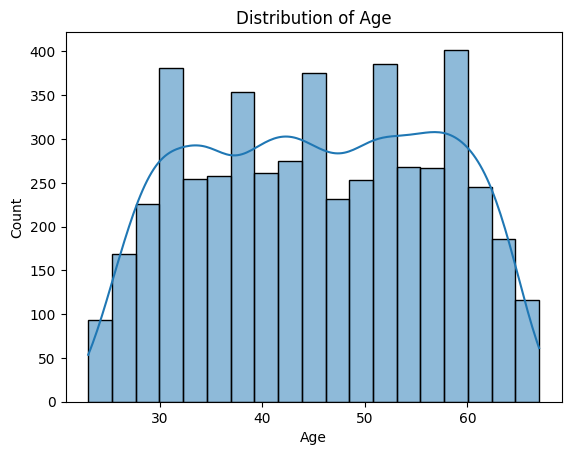

count    5000.000000
mean       45.338400
std        11.463166
min        23.000000
25%        35.000000
50%        45.000000
75%        55.000000
max        67.000000
Name: Age, dtype: float64


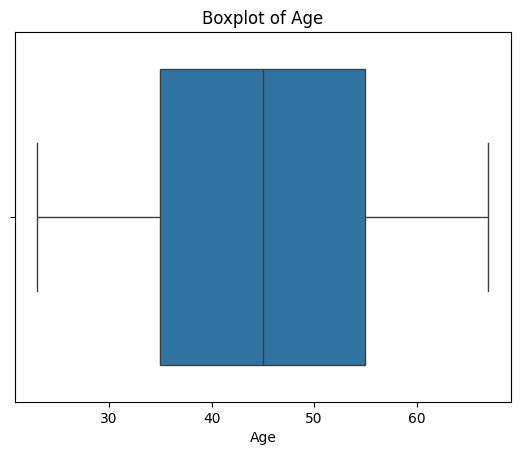

In [13]:
# Plot Age as histogram and boxplot
plt.figure()  
sns.histplot(df['Age'], kde=True) 
plt.title('Distribution of Age')
plt.show()
print(df['Age'].describe())
plt.figure()
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')
plt.show()

* Customer ages range from 23 to 67, with an average age of 45.
* The distribution is near symmetric.
* 50% of the customers are between 35 and 55 years old (the interquartile range)."


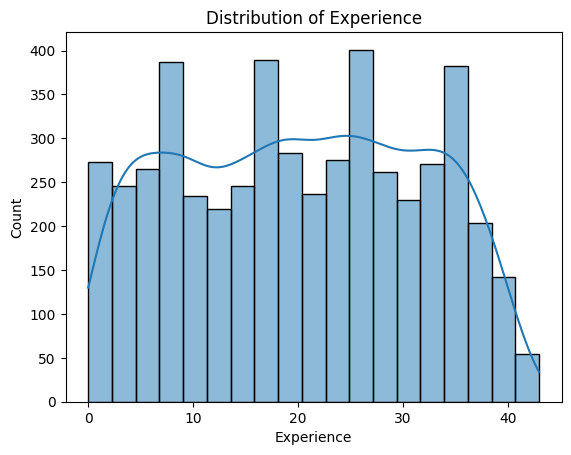

count    5000.000000
mean       20.134600
std        11.415189
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64


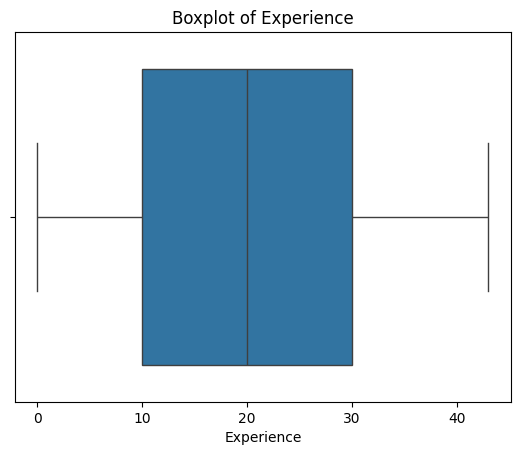

In [14]:
# Plot Experience as histogram and boxplot
plt.figure() 
sns.histplot(df['Experience'], kde=True)
plt.title('Distribution of Experience')
plt.show()
print(df['Experience'].describe())
plt.figure()
sns.boxplot(x=df['Experience'])
plt.title('Boxplot of Experience')
plt.show()

*  The range of experience is quite wide (0-43 years), indicating a diverse customer base in terms of professional tenure.
*  The interquartile range is 10-30 years, meaning 50% of customers have between 10 and 30 years of experience.
*  The distribution is near symmetric.

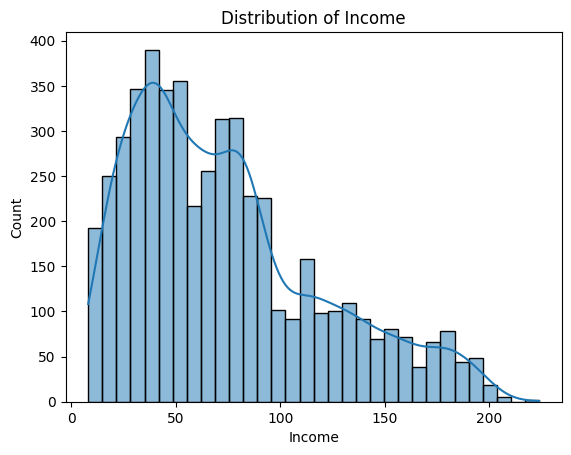

count    5000.000000
mean       73.774200
std        46.033729
min         8.000000
25%        39.000000
50%        64.000000
75%        98.000000
max       224.000000
Name: Income, dtype: float64


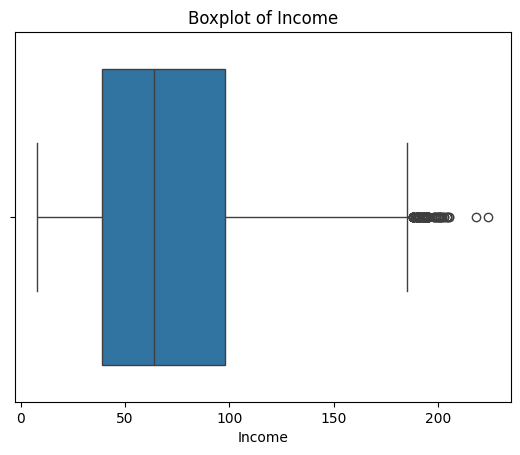

In [15]:
# Plot Income as histogram and boxplot
plt.figure()  
sns.histplot(df['Income'], kde=True)
plt.title('Distribution of Income')
plt.show()
print(df['Income'].describe())
plt.figure()
sns.boxplot(x=df['Income'])
plt.title('Boxplot of Income')
plt.show()

* Customer annual incomes range from \\$8,000 to \\$224,000, with an average income of $73,774.
* The income is right-skewed.
* The IQR \\$39,000 to \\$98,000 shows the range within which the middle 50% of incomes fall, providing a sense of the typical income range.

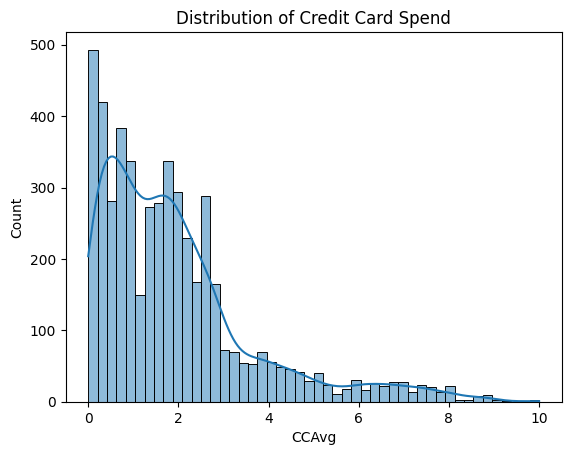

count    5000.000000
mean        1.937938
std         1.747659
min         0.000000
25%         0.700000
50%         1.500000
75%         2.500000
max        10.000000
Name: CCAvg, dtype: float64


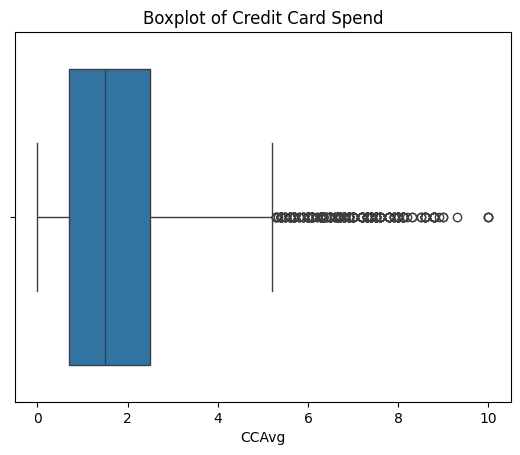

In [16]:
# Plot Average Credit Card Spend as histogram and boxplot
plt.figure()
sns.histplot(df['CCAvg'], kde=True)
plt.title('Distribution of Credit Card Spend')
plt.show()
print(df['CCAvg'].describe())
plt.figure()
sns.boxplot(x=df['CCAvg'])
plt.title('Boxplot of Credit Card Spend')
plt.show()

* The spending varies considerably, from \\$0 to \\$10,000 per month. Denoting some customers dont use credit cards or have no spending recorded.
* The credit card spend is right-skewed.
The IQR \\$700 to \\$2,500 provides a good representation of the typical spending range for the middle 50% of the customer base, less influenced by extreme values.

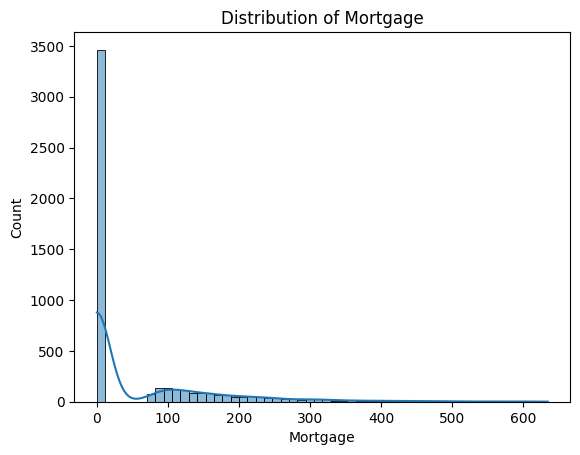

count    5000.000000
mean       56.498800
std       101.713802
min         0.000000
25%         0.000000
50%         0.000000
75%       101.000000
max       635.000000
Name: Mortgage, dtype: float64


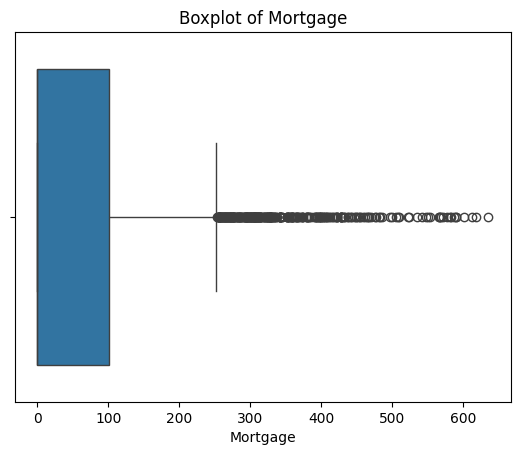

In [17]:
# Plot Mortgage as histogram and boxplot
plt.figure()
sns.histplot(df['Mortgage'], kde=True)
plt.title('Distribution of Mortgage')
plt.show()
print(df['Mortgage'].describe())
plt.figure()
sns.boxplot(x=df['Mortgage'])
plt.title('Boxplot of Mortgage')
plt.show()

* The mortgage is right-skewed.
* Median: 50% of customers have a mortgage value of $0. This suggests that a significant portion of the customer base does not have a mortgage.
* The boxplot shows numerous data points beyond the upper whisker, indicating the presence of many high-value mortgages that are considered outliers. These outliers likely contribute significantly to the high mean and standard deviation.  

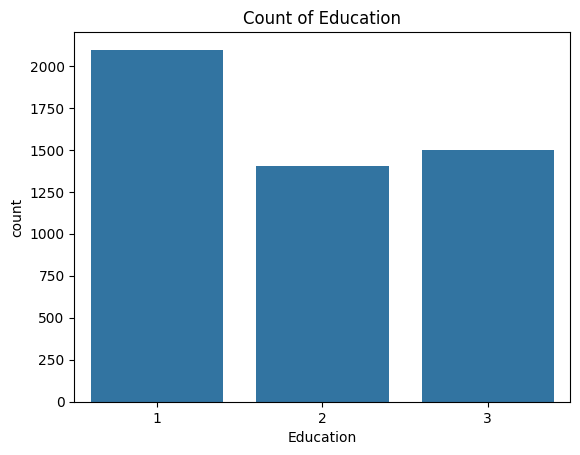

1    0.4192
3    0.3002
2    0.2806
Name: Education, dtype: float64


In [18]:
# plot count of education category
plt.figure()
sns.countplot(x=df['Education'])
plt.title('Count of Education')
plt.show()
print(df['Education'].value_counts(normalize=True))


* Undergraduate education is the most common among customers.
* The proportions of graduate and advanced/professional degrees are relatively close.
* There's a good representation of all three education levels within the customer base.

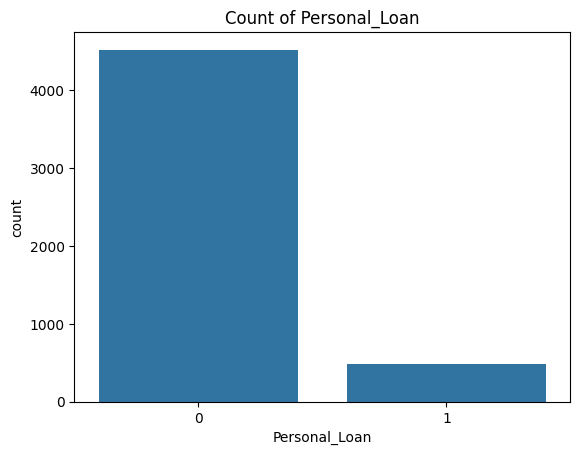

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64


In [19]:
# plot count of Personal_Loan category
plt.figure()
sns.countplot(x=df['Personal_Loan'])
plt.title('Count of Personal_Loan')
plt.show()
print(df['Personal_Loan'].value_counts(normalize=True))

* This is our target variable
* Only 9.6% of customers accepted the personal loan offered in the last campaign, while the vast majority (90.4%) did not. 

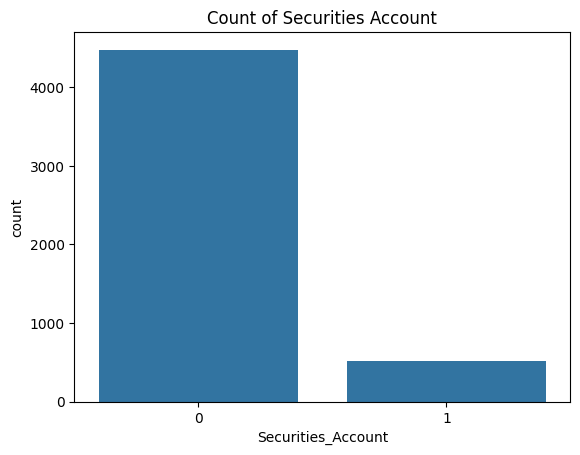

0    0.8956
1    0.1044
Name: Securities_Account, dtype: float64


In [20]:
# plot count of Securities_Account category
plt.figure()
sns.countplot(x=df['Securities_Account'])
plt.title('Count of Securities Account')
plt.show()
print(df['Securities_Account'].value_counts(normalize=True))

* Approximately 10.44% ofcustomers have a securities account with the bank, while the vast majority (89.56%) do not

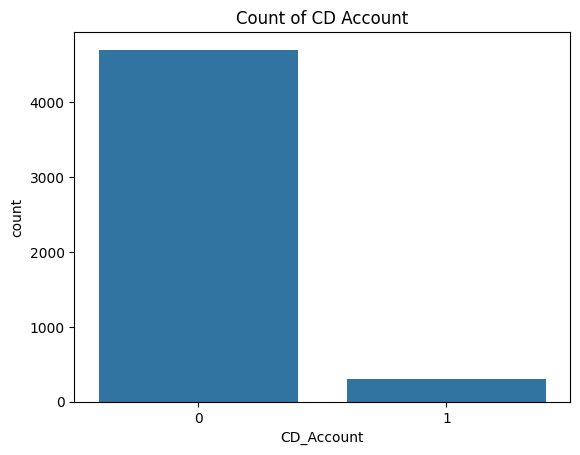

0    0.9396
1    0.0604
Name: CD_Account, dtype: float64


In [21]:
# plot count of CD_Account category
plt.figure()
sns.countplot(x=df['CD_Account'])
plt.title('Count of CD Account')
plt.show()
print(df['CD_Account'].value_counts(normalize=True))

* A very small percentage (6.04%) of customers have a CD account, while the vast majority (93.96%) do not.

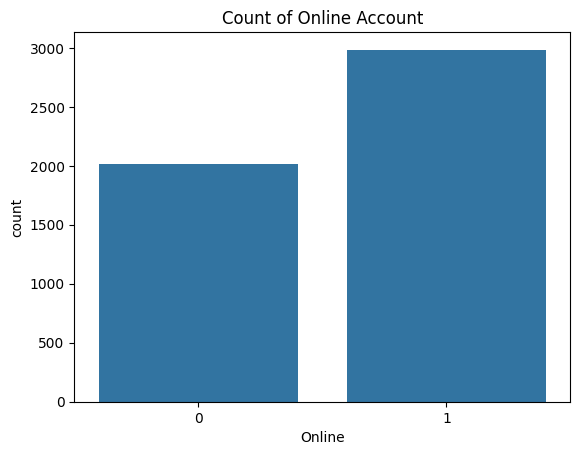

1    0.5968
0    0.4032
Name: Online, dtype: float64


In [22]:
# plot count of Online category
plt.figure()
sns.countplot(x=df['Online'])
plt.title('Count of Online Account')
plt.show()
print(df['Online'].value_counts(normalize=True))

* A majority of customers (59.68%) use online banking facilities, while a substantial minority (40.32%) do not.

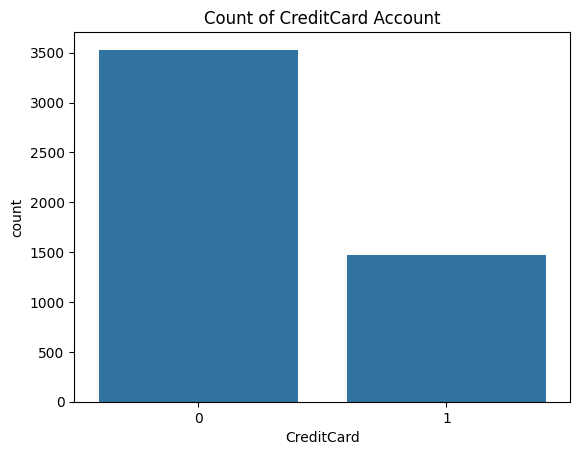

0    0.706
1    0.294
Name: CreditCard, dtype: float64


In [23]:
# plot count of CreditCard category
plt.figure()
sns.countplot(x=df['CreditCard'])
plt.title('Count of CreditCard Account')
plt.show()
print(df['CreditCard'].value_counts(normalize=True))

* A significant majority of customers (70.6%) do not use a credit card from another bank, while 29.4% do.



In [24]:
# Analyze the zip code
print(df['ZIPCode'].value_counts(normalize=True))

94720    0.0338
94305    0.0254
95616    0.0232
90095    0.0142
93106    0.0114
          ...  
93077    0.0002
94965    0.0002
90068    0.0002
94970    0.0002
91024    0.0002
Name: ZIPCode, Length: 467, dtype: float64


* With 5,000 accounts distributed across 467 ZIP codes, the customer base is relatively dispersed geographically.

### Observations from Univariate analysis
* The dataset contains information about 5,000 customers, with a variety of features including demographic information (age, experience, income, family size), financial behavior (credit card spending, mortgage value), and account holdings (securities account, CD account).
* The target variable is Personal_Loan, indicating whether a customer accepted a personal loan in the last campaign.
* Numerical Features:
  - Age:
    - Ranges from 23 to 67 years old.
    - Mean and median are both around 45, suggesting a roughly symmetrical distribution.
    - 50% of customers are between 35 and 55 years old.
  - Experience:
    - Ranges from 0 to 43 years.
    - Mean and median are both around 20 years, suggesting a roughly symmetrical distribution.
    - 50% of customers have between 10 and 30 years of experience.
    - Negative values were observed and require further investigation or cleanup.
  - Income:
    - Ranges from \\$8,000 to \\$224,000 per year.
    - Mean (\\$73,774) is higher than the median (\\$64,000), indicating a right-skewed distribution.
    - 50% of customers have incomes between \\$39,000 and \\$98,000.
  - CCAvg (Average credit card spending):
    - Ranges from \\$0 to \\$10,000 per month.
    - Mean (\\$1,938) is higher than the median (\\$1,500), suggesting a right-skewed distribution.
    - 50% of customers have average spending between \\$700 and \\$2,500.
  - Mortgage:
    - Ranges from \\$0 to \\$635,000.
    - Highly right-skewed distribution with many zero values and a long tail of high values.
    - Mean (\\$56,499) is much higher than the median (\\$0).
    - 50% of customers with mortgages have values between \\$0 and \\$101,000.
* Categorical Features:

  - Education:
    - 41.92% Undergraduate, 30.02% Advanced/Professional, 28.06% Graduate.
    - Relatively balanced distribution across the three levels.
  - Personal_Loan (Target Variable):
    - 9.6% of customers accepted the loan, 90.4% did not.
    - Significant class imbalance (9:1), requiring techniques like class weights or sampling methods.
  - Securities_Account:
    - 10.44% have a securities account, 89.56% do not.
    - Moderate class imbalance.
  - CD_Account:
    - 6.04% have a CD account, 93.96% do not.
    - Significant class imbalance.
  - Online:
    - 59.68% use online banking, 40.32% do not.
    - Relatively balanced distribution.
  - CreditCard:
    - 29.4% use a credit card from another bank, 70.6% do not.
    - Moderate class imbalance.
  - ZIPCode:
    - 5,000 customers are distributed across 467 unique ZIP codes.
    - High cardinality requires grouping or encoding techniques for analysis and modeling.

### Bivariate analysis
* Numerical vs. Target (Personal_Loan):
  - Visually show the distribution of each numerical variable for loan takers and non-loan takers
* Categorical vs. Target (Personal_Loan):
  - Compare the proportions of loan takers and non-loan takers across different categories.
* Numerical vs. Numerical
  - Calculate the correlation between all pairs of numerical variables. This will provide a numerical measure of the linear relationship between them.


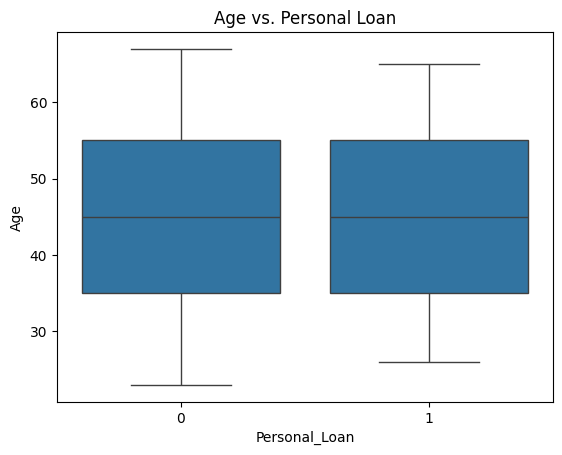

In [25]:
sns.boxplot(x='Personal_Loan', y='Age', data=df)
plt.title('Age vs. Personal Loan')
plt.show()


* There is little to no  difference in the age distribution between customers who took a personal loan and those who did not.
* Age, by itself, does not appear to be a strong predictor of personal loan acceptance in this dataset.
* This suggests that other factors are likely more influential in determining whether a customer takes a loan.

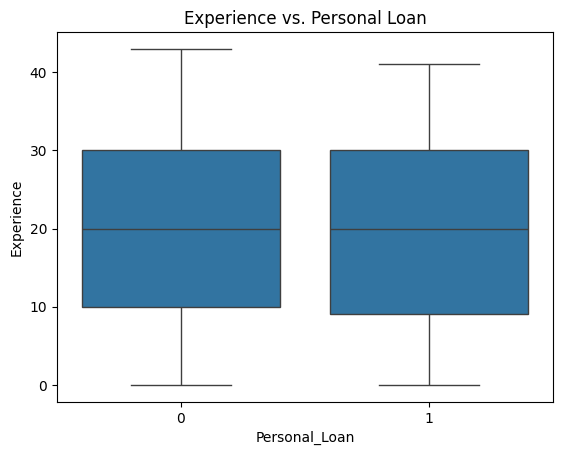

In [26]:
sns.boxplot(x='Personal_Loan', y='Experience', data=df)
plt.title('Experience vs. Personal Loan')
plt.show()



* There appears to be no significant difference in the distribution of professional experience between customers who accepted the personal loan and those who did not.
*  This suggests that professional experience, by itself, might not be a strong predictor of personal loan acceptance in this dataset.

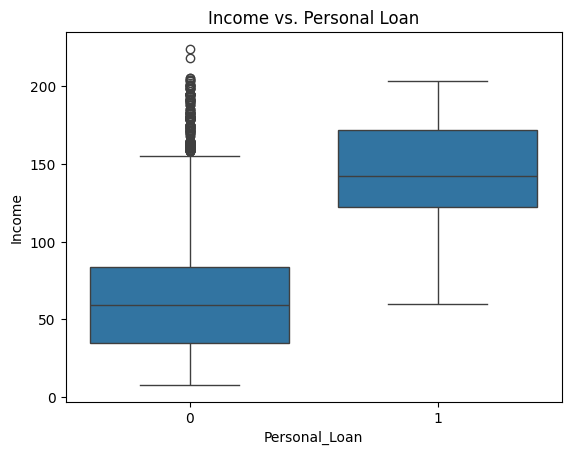

In [27]:
sns.boxplot(x='Personal_Loan', y='Income', data=df)
plt.title('Income vs. Personal Loan')
plt.show()

* There seems to be a relationship between income and the likelihood of accepting a personal loan.
*  Customers with higher incomes appear to be more likely to have accepted the loan offer.
*  There appear to be some high-income outliers in the group of customers who did not accept the loan.

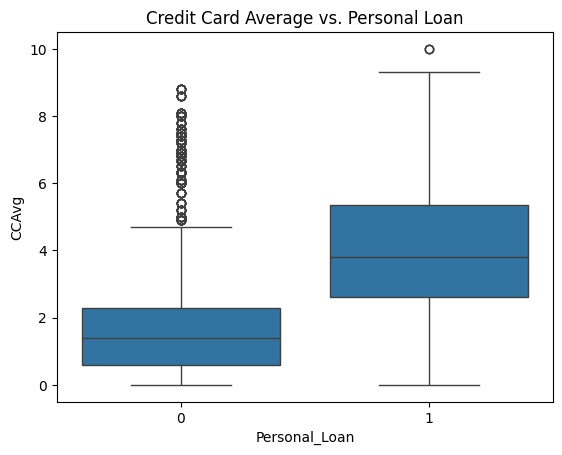

In [28]:
sns.boxplot(x='Personal_Loan', y='CCAvg', data=df)
plt.title('Credit Card Average vs. Personal Loan')
plt.show()

* There appears to be a strong relationship between average credit card spending (CCAvg) and the likelihood of accepting a personal loan.
* Customers with higher average credit card spending are more likely to have accepted the loan offer.

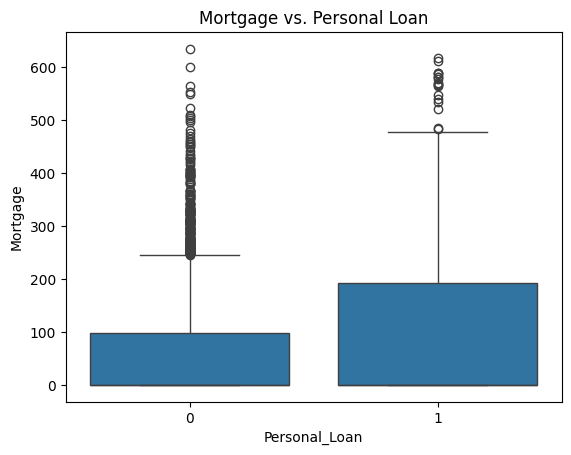

In [29]:
sns.boxplot(x='Personal_Loan', y='Mortgage', data=df)
plt.title('Mortgage vs. Personal Loan')
plt.show()

* There appears to be a relationship between mortgage value and the likelihood of accepting a personal loan.
* Customers with higher mortgage values are more likely to have accepted the loan offer.
* This could be due to various factors, such as the need for additional funds to manage mortgage expenses or home improvement projects which are common with homeowners.

Table with Column Percentages:

Personal_Loan      0      1
Education                  
1              44.31  19.38
2              27.01  37.92
3              28.67  42.71


<Figure size 800x600 with 0 Axes>

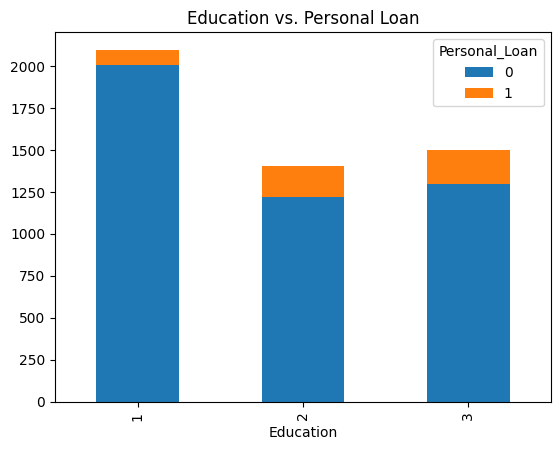

In [30]:
tab = pd.crosstab(df['Education'], df['Personal_Loan'])
tab_percent = tab.div(tab.sum(axis=0), axis=1) * 100
print("Table with Column Percentages:\n")
print(tab_percent.round(2))

plt.figure(figsize=(8, 6))
tab.plot(kind='bar', stacked=True)
plt.title('Education vs. Personal Loan')
plt.show()

* Customers with advanced/professional degrees have the highest proportion of loan acceptance, followed by graduate and then undergraduate.

Table with Column Percentages:

Personal_Loan           0     1
Securities_Account             
0                   89.78  87.5
1                   10.22  12.5


<Figure size 800x600 with 0 Axes>

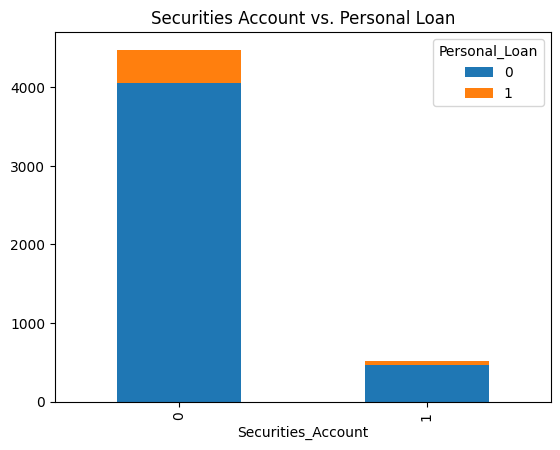

In [31]:
tab = pd.crosstab(df['Securities_Account'], df['Personal_Loan'])
tab_percent = tab.div(tab.sum(axis=0), axis=1) * 100
print("Table with Column Percentages:\n")
print(tab_percent.round(2))

plt.figure(figsize=(8, 6))
tab.plot(kind='bar', stacked=True)
plt.title('Securities Account vs. Personal Loan')
plt.show()

* The majority of customers in both groups did not accept the loan, there appears to be a slightly higher proportion of loan acceptance among customers who have a Securities Account.

Table with Column Percentages:

Personal_Loan      0      1
CD_Account                 
0              96.42  70.83
1               3.58  29.17


<Figure size 800x600 with 0 Axes>

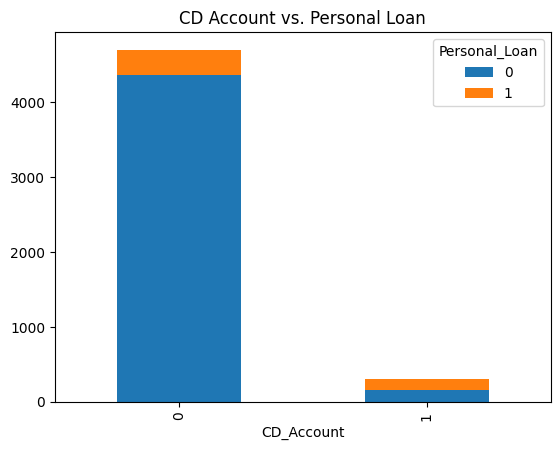

In [32]:
tab = pd.crosstab(df['CD_Account'], df['Personal_Loan'])
tab_percent = tab.div(tab.sum(axis=0), axis=1) * 100
print("Table with Column Percentages:\n")
print(tab_percent.round(2))


plt.figure(figsize=(8, 6))
tab.plot(kind='bar', stacked=True)
plt.title('CD Account vs. Personal Loan')
plt.show()


* A  larger percentage of customers who took a personal loan had a CD account compared to those who did not take a loan.

Table with Column Percentages:

Personal_Loan      0      1
Online                     
0              40.42  39.38
1              59.58  60.62


<Figure size 800x600 with 0 Axes>

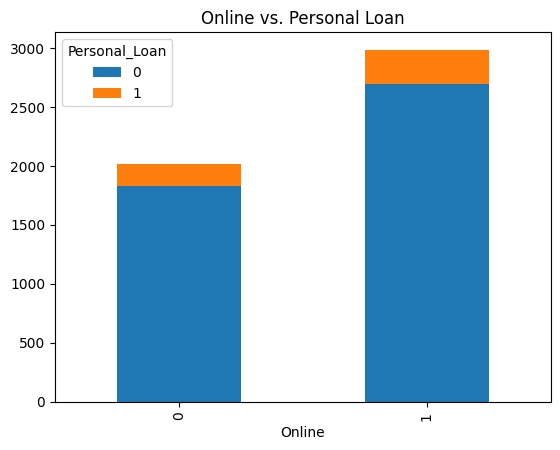

In [33]:
tab = pd.crosstab(df['Online'], df['Personal_Loan'])

tab_percent = tab.div(tab.sum(axis=0), axis=1) * 100
print("Table with Column Percentages:\n")
print(tab_percent.round(2))

plt.figure(figsize=(8, 6))
tab.plot(kind='bar', stacked=True)
plt.title('Online vs. Personal Loan')
plt.show()


* The percentages of online banking users are remarkably similar between those who took a loan and those who did not (approximately 60% in both groups).

Table with Column Percentages:

Personal_Loan      0      1
CreditCard                 
0              70.64  70.21
1              29.36  29.79


<Figure size 800x600 with 0 Axes>

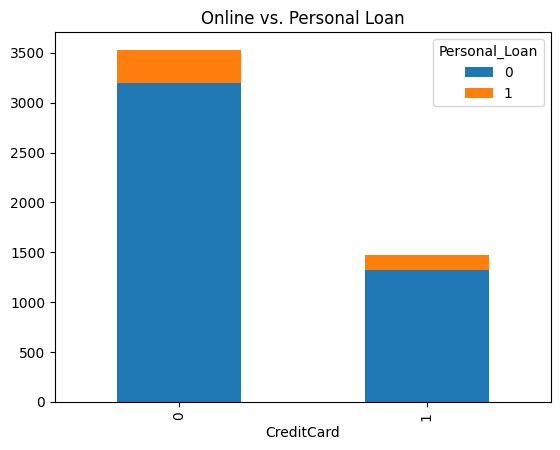

In [34]:
tab = pd.crosstab(df['CreditCard'], df['Personal_Loan'])

tab_percent = tab.div(tab.sum(axis=0), axis=1) * 100
print("Table with Column Percentages:\n")
print(tab_percent.round(2))

plt.figure(figsize=(8, 6))
tab.plot(kind='bar', stacked=True)
plt.title('Online vs. Personal Loan')
plt.show()


* The percentages of customers with and without credit cards from other banks are virtually the same between those who took a loan and those who did not. The differences are less than 0.1%.


Correlation Matrix:
                  Age  Experience    Income    Family     CCAvg  Mortgage
Age         1.000000    0.993991 -0.055269 -0.046418 -0.052012 -0.012539
Experience  0.993991    1.000000 -0.046876 -0.051851 -0.049738 -0.011097
Income     -0.055269   -0.046876  1.000000 -0.157501  0.645984  0.206806
Family     -0.046418   -0.051851 -0.157501  1.000000 -0.109275 -0.020445
CCAvg      -0.052012   -0.049738  0.645984 -0.109275  1.000000  0.109905
Mortgage   -0.012539   -0.011097  0.206806 -0.020445  0.109905  1.000000


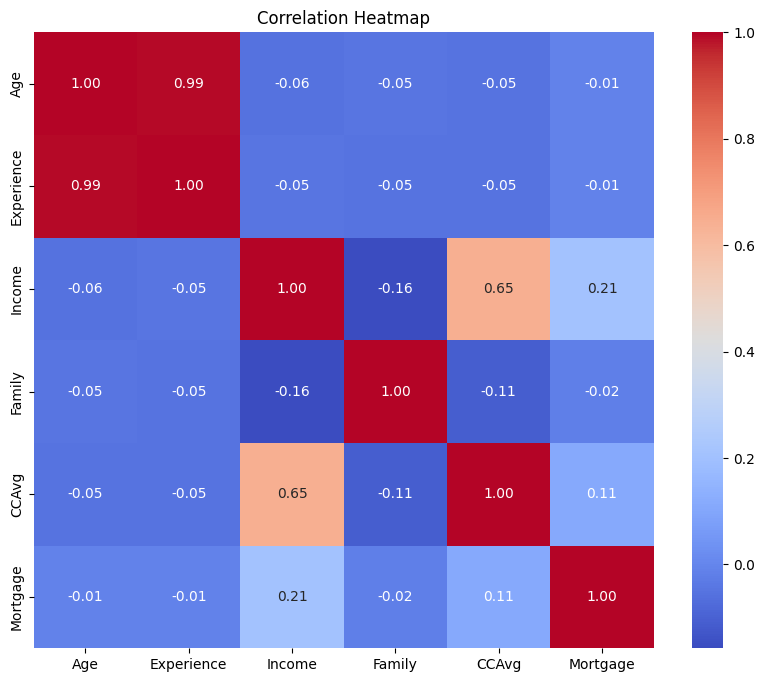

In [35]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_cols.corr()

# Print the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

* Age and Experience have a very high positive correlation (0.99), as expected.
* Income has a moderate positive correlation with CCAvg (0.65).
* Family size shows weak correlations with other features.

<Figure size 1200x800 with 0 Axes>

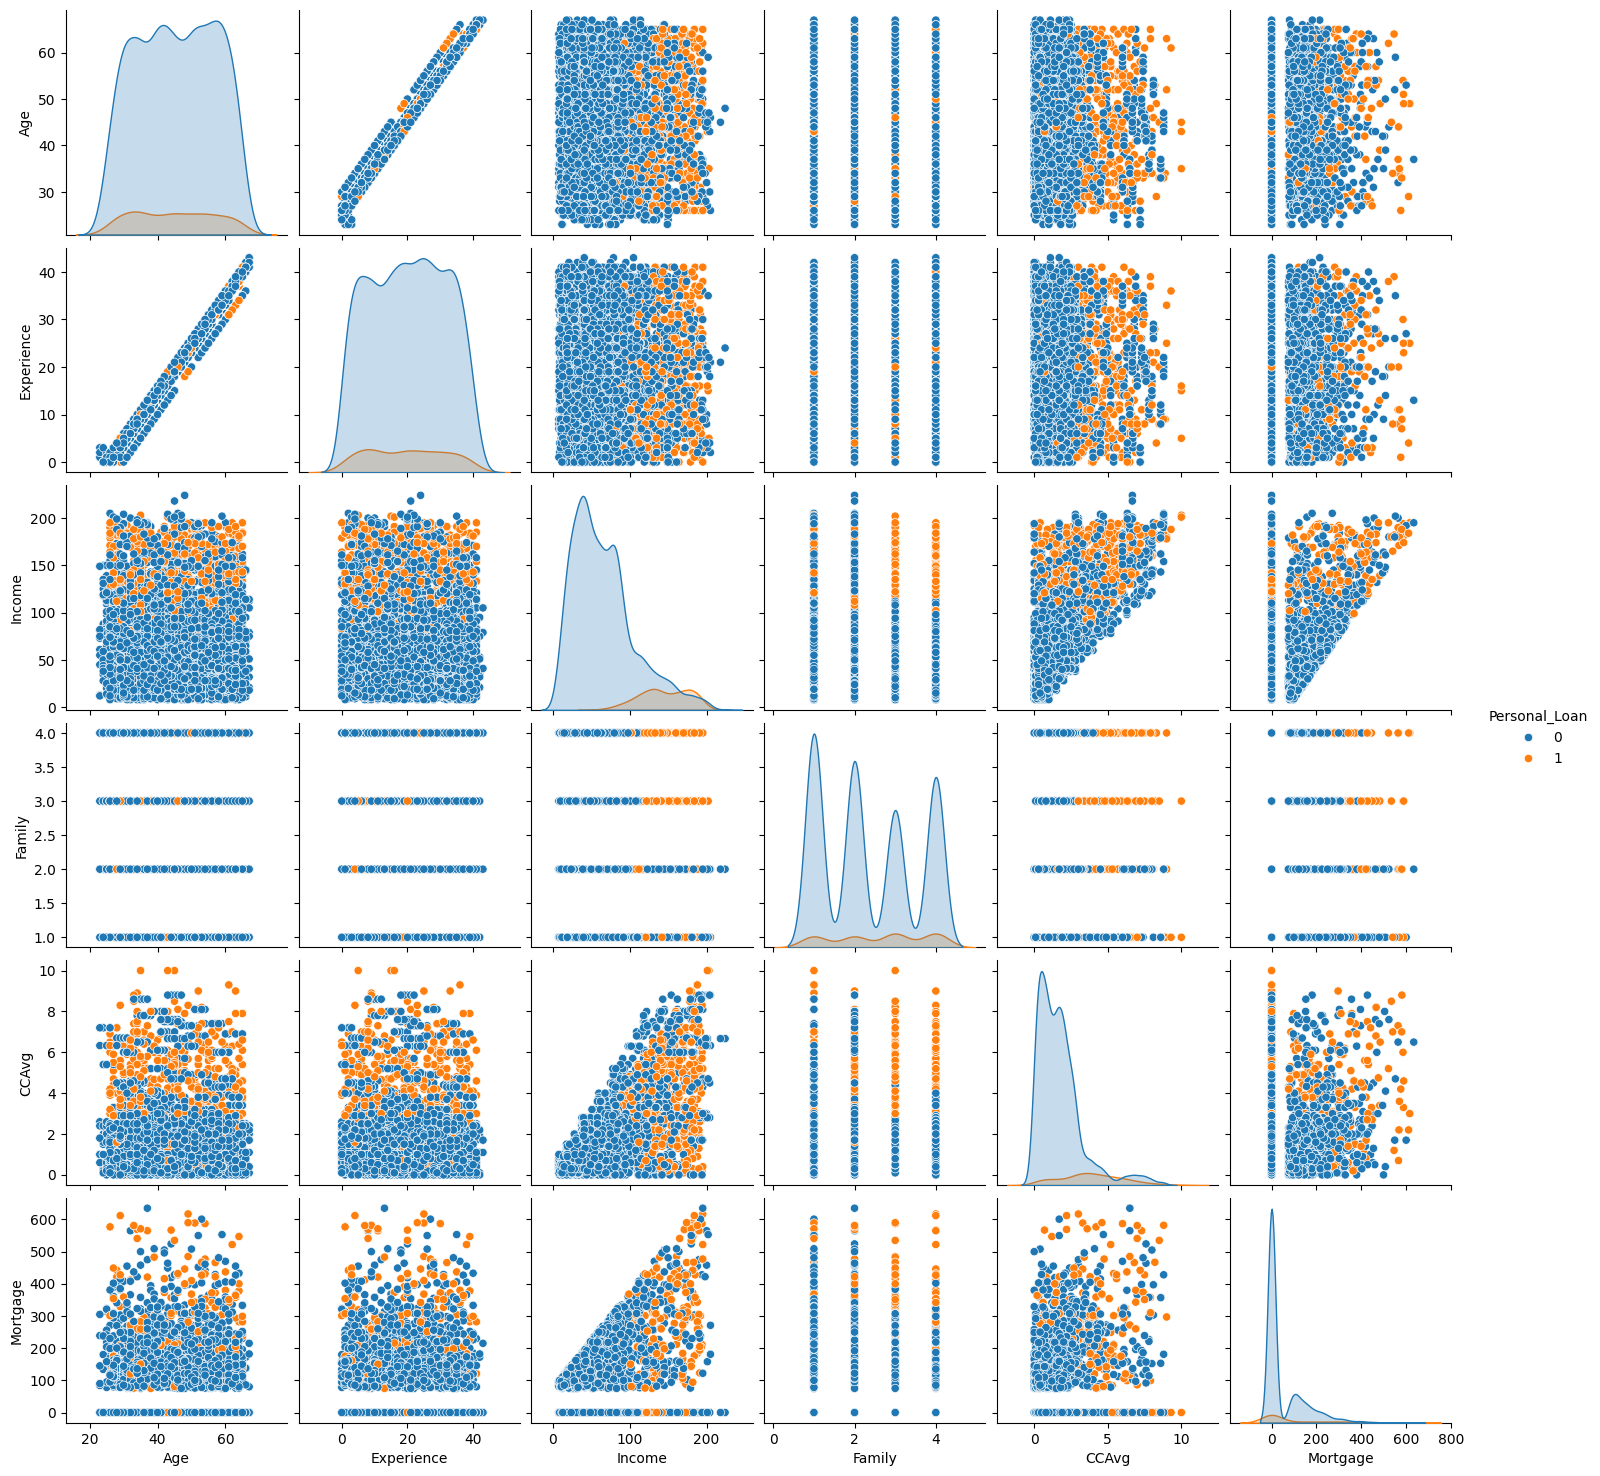

In [36]:
# Scatter plot matrix
plt.figure(figsize=(12, 8))
sns.pairplot(df, vars=numerical_cols, hue='Personal_Loan', diag_kind='kde');

##### Here's a summary of the bivariate analysis findings:

  * Numerical vs. Target (Personal_Loan)

    - Age:
      - No clear relationship between age and loan acceptance. The distributions of age for loan takers and non-loan takers are very similar.
    - Experience:
      - Similar to age, there's no strong evidence of a relationship between experience and loan acceptance.
    - Income:
      - Customers who accepted the loan tend to have higher incomes compared to those who did not. This suggests a positive association between income and loan acceptance.
    - CCAvg (Average credit card spending):
      -  Customers with higher average credit card spending are more likely to have accepted the loan, indicating a positive association.
    - Mortgage:
      - Those who accepted the loan tend to have higher mortgage values, suggesting a potential positive relationship.


 * Categorical vs. Target (Personal_Loan)

   - Education:
     - Higher education levels are associated with a greater likelihood of loan acceptance. The proportion of loan takers increases as education level goes up.
   - Securities Account:
     - A slightly higher proportion of loan takers have securities accounts compared to non-loan takers, but the difference is small.
   - CD Account:
     - Customers with CD accounts are substantially more likely to have accepted the loan. This appears to be a strong predictor.
   - Online:
     - There is no apparent association between using online banking and loan acceptance. The proportions of online banking users are almost identical between the two groups.
   - Credit Card (from another bank):
     - No clear association between having a credit card from another bank and loan acceptance.

 * Correlation Analysis (Numerical Features)

   - Age and Experience:
     - Very strong positive correlation (0.99), suggesting potential multicollinearity if both are included in the model.
   - Income and CCAvg:
     - Moderate positive correlation (0.65), indicating that these variables might capture some similar information.
   - Other correlations:
     - Mostly weak correlations between other pairs of numerical features.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
   - Mortgage attribute has a highly right-skewed distribution. This means that a large portion of customers have a mortgage value of $0 (no mortgage), and the remaining customers have mortgage values that are spread out, with a long tail of high-value mortgages.
   - Pattern: The primary pattern is the high concentration of zero values, followed by a decreasing frequency of higher values.
   - Outliers: There are numerous high-value mortgages that are considered outliers, as shown in the boxplot. These values are significantly higher than the typical mortgage values in the dataset.
2. How many customers have credit cards?
   - 1470 customers have credit cards from other banks.
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
   - Income: Higher incomes are associated with a higher likelihood of taking a personal loan.
   - CCAvg (Average credit card spending): Higher average credit card spending is associated with a higher likelihood of taking a personal loan.
   - Mortgage: Higher mortgage values are associated with a higher likelihood of taking a personal loan.
   - Education: Higher education levels are associated with a higher likelihood of taking a personal loan.
   - CD Account: Having a CD account is strongly associated with a higher likelihood of taking a personal loan.
4. How does a customer's interest in purchasing a loan vary with their age?
   - There is no clear relationship between age and the likelihood of taking a personal loan.
   - The age distributions for loan takers and non-loan takers are very similar. Therefore, age, by itself, does not appear to be a strong predictor.
5. How does a customer's interest in purchasing a loan vary with their education?
   - There is a clear positive relationship between education level and the likelihood of taking a personal loan.
   - Customers with higher education levels are more likely to take a personal loan compared to those with an Undergraduate education.

## Data Preprocessing

#### Missing value treatment
  - Not needed as there are no missing vaues.

#### Feature engineering

* ZipCode has a high cardinality with 467 unique values. Though decision trees can handle it without any significat issues, it would be beneficial to reduce this cardinality to improve the performance and computational efficiency
* First-N-Digits Grouping is a common and simpler way to rediuce this cardinality. However we need to understand the relationship between 'ZipCode' and 'Personal Loan' before encode the values.
* The Chi-square test is used to determine if there's a statistically significant association between two categorical variables.
* This is available from scipy.stats package.
* The test provides a P-Value, a P-value > 0.05 is considered there is no statistically significant association between the variables. 

In [37]:
from scipy.stats import chi2_contingency

# Create a cross tab with ZipCode and Personal Loan
tab = pd.crosstab(df['ZIPCode'], df['Personal_Loan'])
chi2, p, dof, expected = chi2_contingency(tab)
print(f"Chi-square test: p-value = {p}")


#grouping by the first 2 digits of the ZIP code
df['ZIPCode_2digit'] = df['ZIPCode'].astype(str).str[:2]
tab_grouped = pd.crosstab(df['ZIPCode_2digit'], df['Personal_Loan'])

chi2_grouped, p_grouped, dof_grouped, expected_grouped = chi2_contingency(tab_grouped)
print(f"Chi-square test with grouped zipcodes: p-value = {p_grouped}")


Chi-square test: p-value = 0.7596677658976876
Chi-square test with grouped zipcodes: p-value = 0.9963935908429696


* From the p-value, its evident that ZipCode doesn't have any statistical significance with the target variable.
* The p-values remain close even after grouping
* We will replace zipcode with 2 digits.

In [38]:
df['ZIPCode'] = df['ZIPCode_2digit']
df.drop(['ZIPCode_2digit'], axis=1, inplace=True)

* Age and Experience are highly correlated. We can drop Experience and choose age

In [39]:
df.drop(['Experience'], axis=1, inplace=True)

### Outlier detection and treatment

* Skewed Data Is Less of a Problem for Decision Trees.
* There is a potential for overfitting, as the tree can split based on the values in the right end / outliers.
* Generally a log transformation will help in reducing the skewness. It also helps to create a more balanced distribution of values, which can sometimes improve the tree's ability to find good split points.
* Based on this we will apply log transformation on Income, CCAvg and Mortgage.

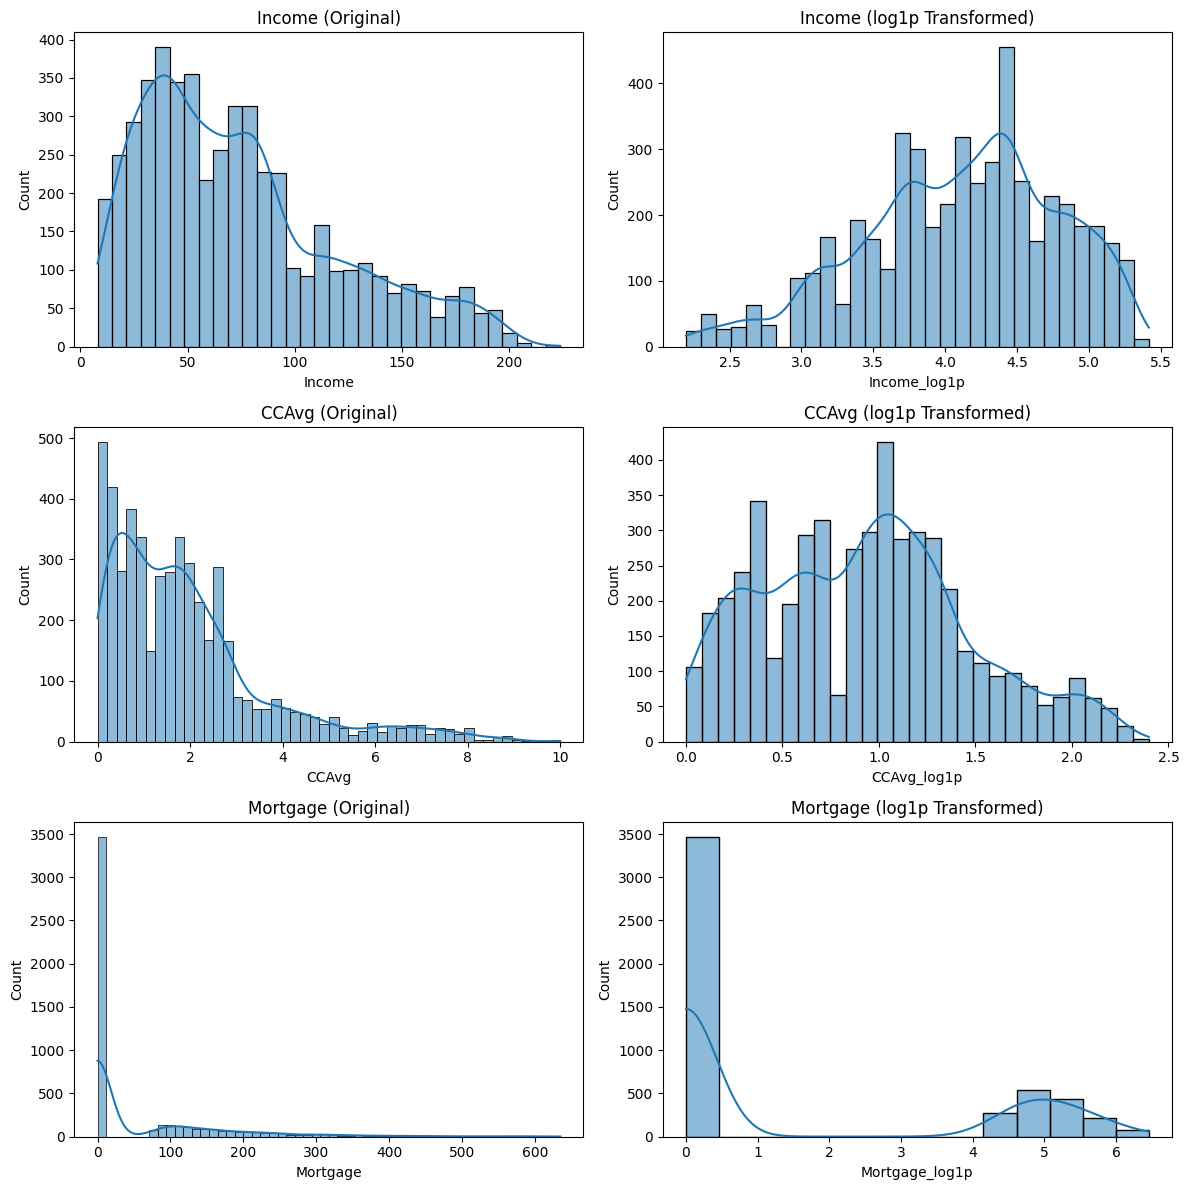

In [40]:
# Apply log transformation on Income, CCAvg and Mortgage.

df['Income_log1p'] = np.log1p(df['Income'])
df['CCAvg_log1p'] = np.log1p(df['CCAvg'])
df['Mortgage_log1p'] = np.log1p(df['Mortgage'])

fig, axes = plt.subplots(3, 2, figsize=(12, 12))  # 3 rows, 2 columns of plots

# Income
sns.histplot(df['Income'], ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Income (Original)')
sns.histplot(df['Income_log1p'], ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Income (log1p Transformed)')

# CCAvg
sns.histplot(df['CCAvg'], ax=axes[1, 0], kde=True)
axes[1, 0].set_title('CCAvg (Original)')
sns.histplot(df['CCAvg_log1p'], ax=axes[1, 1], kde=True)
axes[1, 1].set_title('CCAvg (log1p Transformed)')

# Mortgage
sns.histplot(df['Mortgage'], ax=axes[2, 0], kde=True)
axes[2, 0].set_title('Mortgage (Original)')
sns.histplot(df['Mortgage_log1p'], ax=axes[2, 1], kde=True)
axes[2, 1].set_title('Mortgage (log1p Transformed)')

plt.tight_layout()
plt.show()

* The log1p transformation has done a good job of transforming the variables.
* The transformed data is less skewed and the impact of the outliers has been reduced

In [41]:
df['Income']= df['Income_log1p']
df['Mortgage']= df['Mortgage_log1p']
df['CCAvg']= df['CCAvg_log1p']
df.drop(['Income_log1p','Mortgage_log1p','CCAvg_log1p'], axis =1, inplace=True)


## Preparing data for modeling

In [42]:
# y = 'Personal_Loan' - Target variable. X = everthing other than the target variable.
X = df.drop(["Personal_Loan"], axis=1)
y = df["Personal_Loan"]

# Convert categorical variables to binary variables.
X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)
X = X.astype(float)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

print("Shape of Training set :", X_train.shape)
print("Shape of test set :", X_test.shape)
print("Percentage of classes in training set:")
print( y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set : (3500, 17)
Shape of test set : (1500, 17)
Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


## Model Building

### Model Evaluation Criterion

* Decision trees are a suitable choice for the AllLife Bank personal loan prediction problem. As this is a classification problem.
* Decision trees effectively model non-linear relationships.


### Model Building

We define a utility function to collate all the metrics into a single data frame, and another to plot the confusion matrix.

In [43]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(model,name,dataset, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    return pd.DataFrame(
        {"Model Name":name,"Dataset":dataset,"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

In [44]:
def plot_confusion_matrix(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [45]:
# Create the model

default_model = DecisionTreeClassifier(criterion="gini", random_state=1)
default_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### Checking model performance on training data


,Model Name,Dataset,Accuracy,Recall,Precision,F1
0,Default,Train,1.0,1.0,1.0,1.0


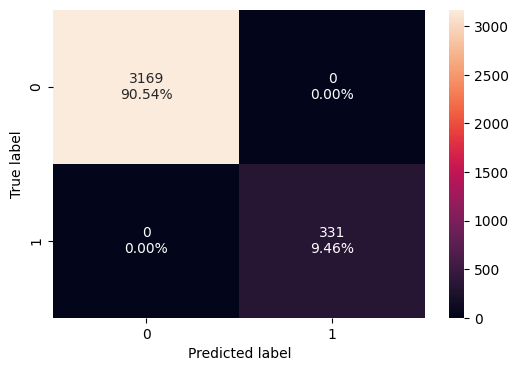

In [46]:
plot_confusion_matrix(default_model, X_train, y_train)
df_perf_default_train = model_performance_classification(default_model,'Default','Train', X_train, y_train)
df_perf_default_train.head()

* The model performs perfect on the traning data, lets verify this on the test data.

,Model Name,Dataset,Accuracy,Recall,Precision,F1
0,Default,Train,1.000,1.000000,1.000000,1.000000
0,Default,Test,0.986,0.932886,0.926667,0.929766


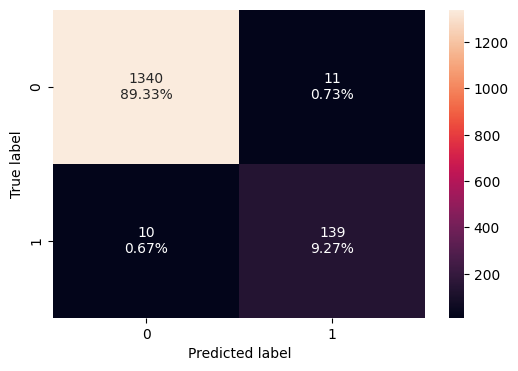

In [47]:
plot_confusion_matrix(default_model, X_test, y_test)
df_perf_default_test = model_performance_classification(default_model,'Default','Test', X_test, y_test)
pd.concat([df_perf_default_train,df_perf_default_test]).head()

- The metrics has the ideal score of 1 for the train datsets.
- Metrics decresed overall in the test dataset.
- This indicates that the model is overfitting on the training dataset.
- We want the recall to be better than the accuracy.
- We are focusing on Recall, since the bank wants to grow its loan business, missing out on potential customers (false negatives) is a significant loss of opportunity.

In [48]:
max_depth = default_model.tree_.max_depth
max_leaf_nodes = default_model.tree_.node_count
min_samples_split = default_model.min_samples_split

print(f"Max Depth: {max_depth}")
print(f"Max Leaf Nodes: {max_leaf_nodes}")
print(f"Min Samples Split: {min_samples_split}")

Max Depth: 10
Max Leaf Nodes: 97
Min Samples Split: 2


#### Visualizing the Decision Tree

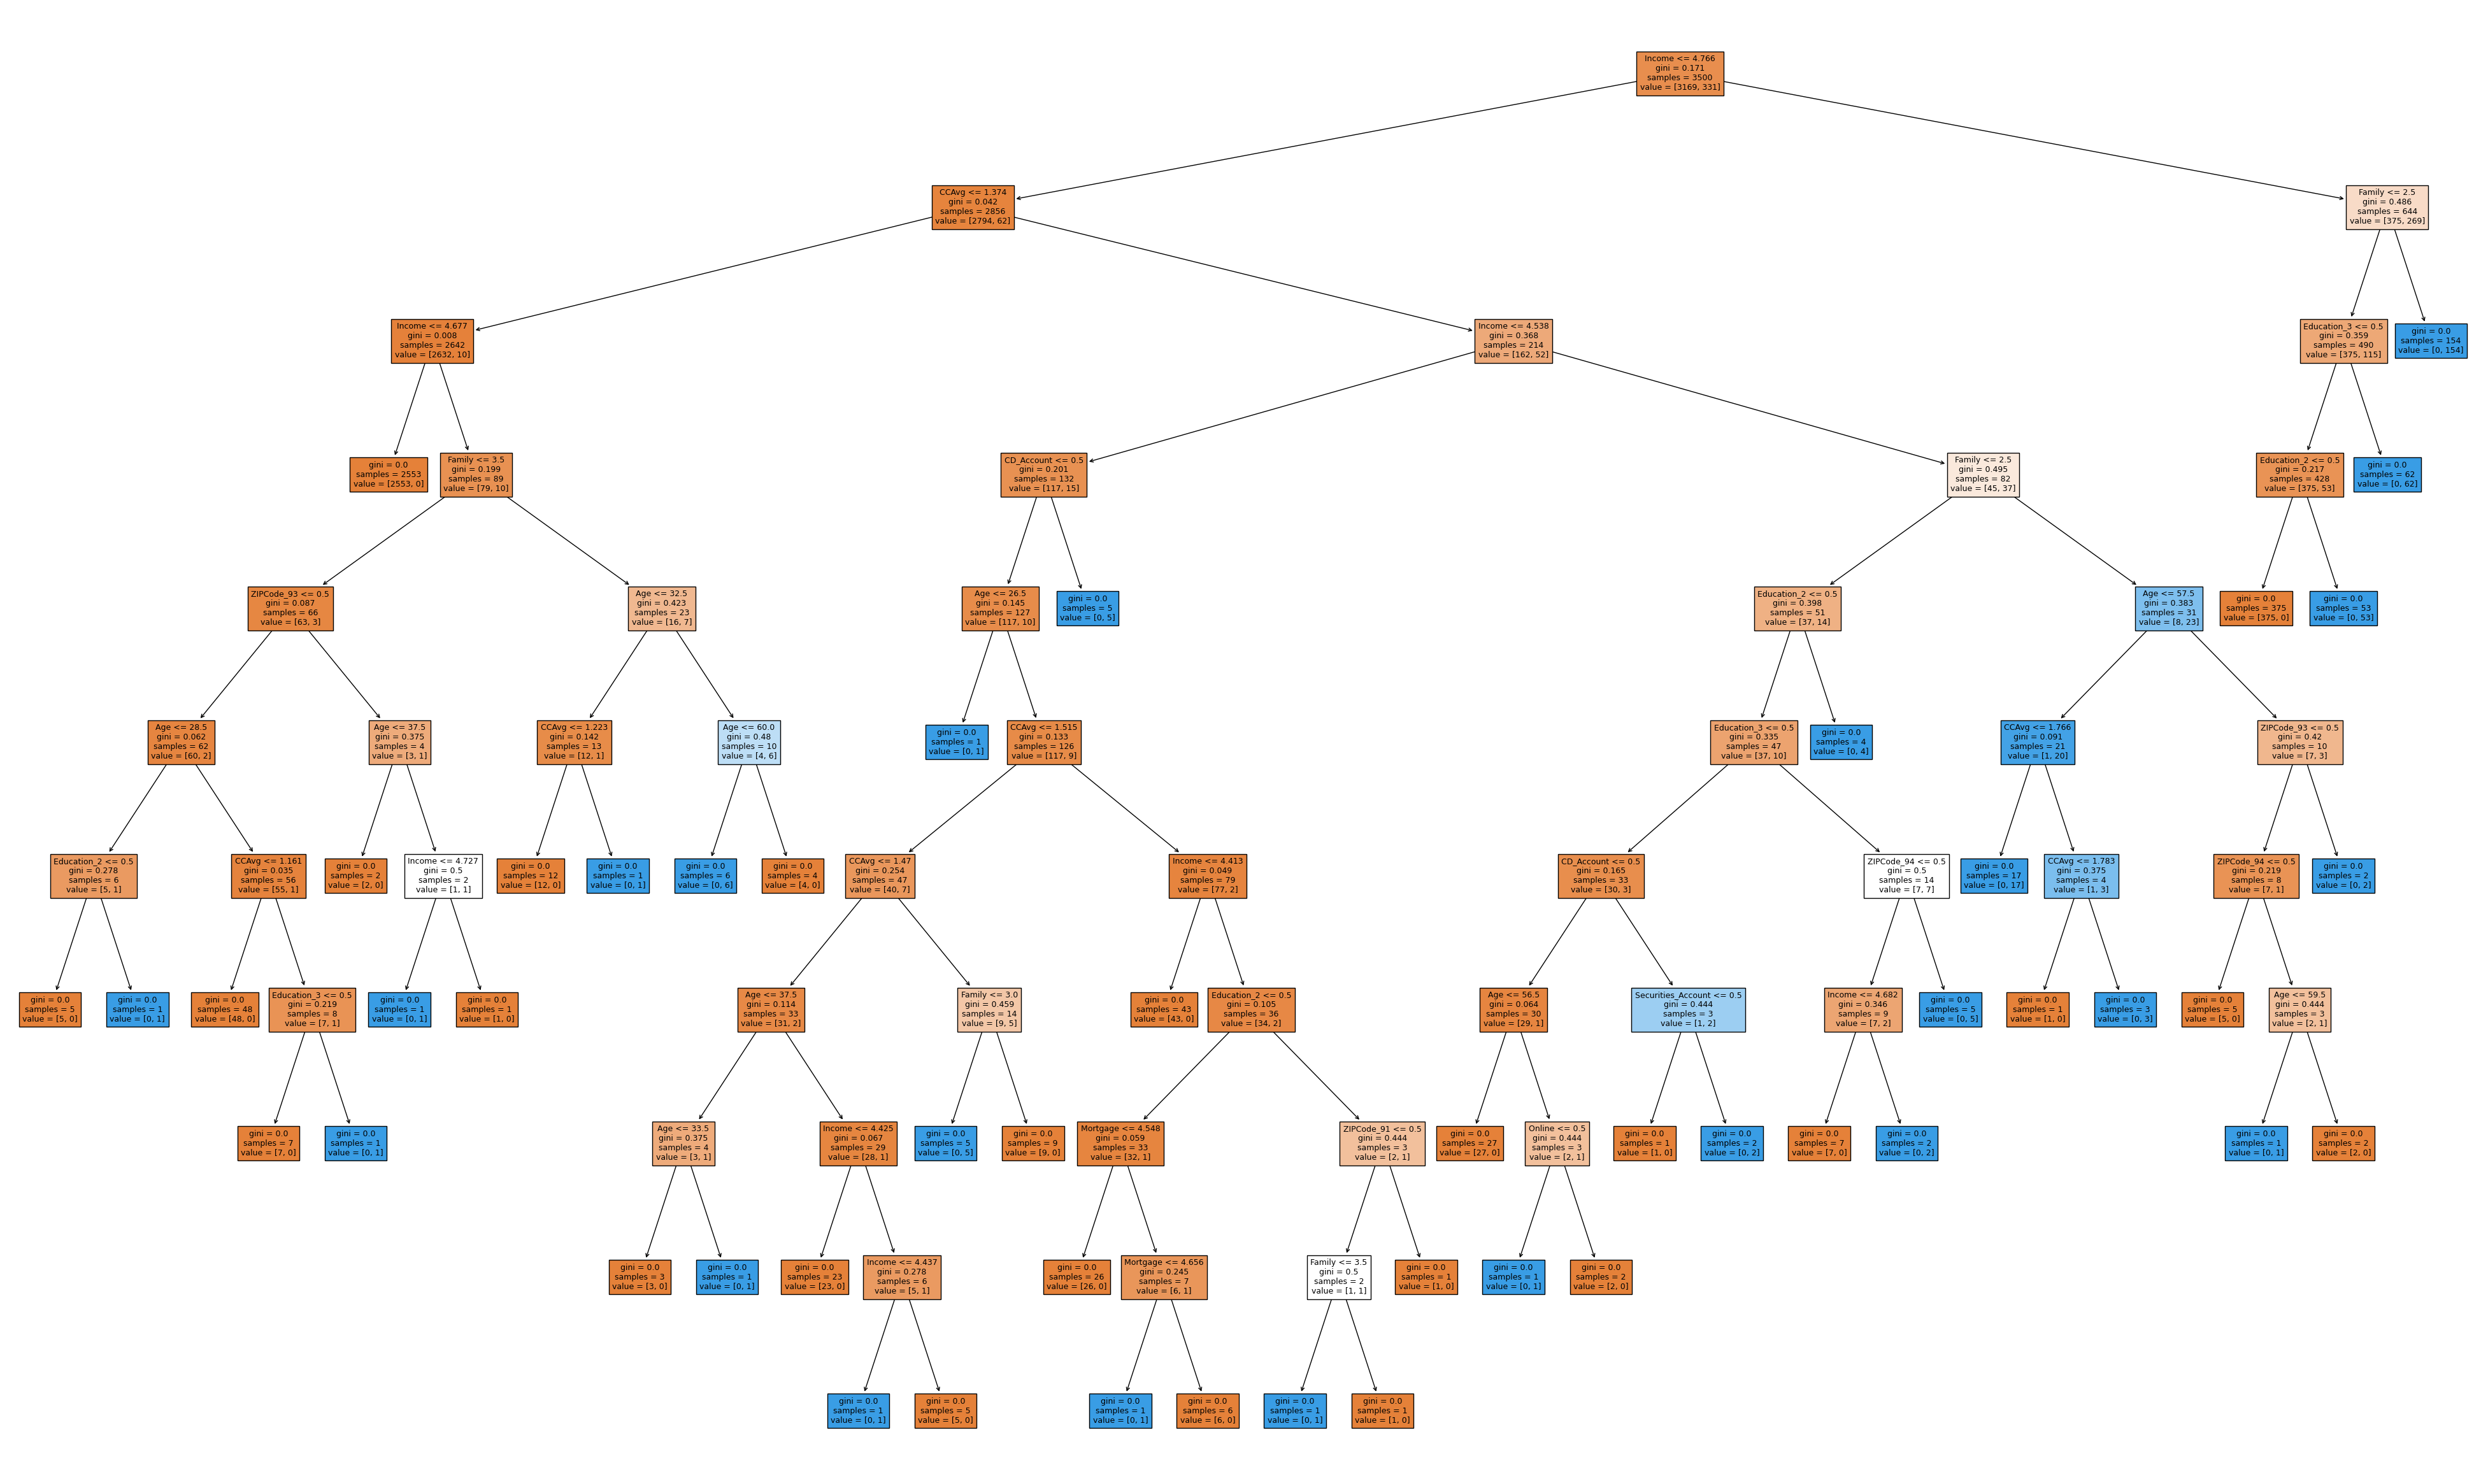

In [49]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(50, 30))

# plotting the decision tree
out = tree.plot_tree(
    default_model,          # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)


# displaying the plot
plt.show()

- We can observe that this is a complex tree.
- Difficult to interpret the decision.
- We will have to tuned some of the parameters to achieve a less complex tree, which good recall value.

## Model Performance Improvement

### Decision Tree (Pre-pruning)

In [50]:
%%time

max_depth_values = np.arange(2, 5, 7)
max_leaf_nodes_values = [50, 75, 150, 250]
min_samples_split_values = [10, 30, 50, 70]

# Initialize variables to store the best model and its performance
tuned_model = None

best_recall_score_diff = float('inf')
best_f1_score_diff = float('inf')

best_test_recall_score = 0.0
best_test_f1_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            dt = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight='balanced',
                random_state=1
            )

            # Fit the model to the training data
            dt.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = dt.predict(X_train)
            y_test_pred = dt.predict(X_test)

            # Calculate f1 scores for training and test sets
            train_f1_score = f1_score(y_train, y_train_pred)
            test_f1_score = f1_score(y_test, y_test_pred)
            
            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test recall scores
            score_diff_f1 = abs(train_f1_score - test_f1_score)
            score_diff_recall = abs(train_f1_score - test_f1_score)

            # Pick the model has the tuned model if the scores are better
            if (score_diff_f1 < best_f1_score_diff) & (score_diff_recall < best_recall_score_diff) \
                & (test_f1_score > best_test_f1_score) & (test_recall_score > best_test_recall_score) :
                best_f1_score_diff = score_diff_f1
                best_recall_score_diff = score_diff_recall
                best_test_f1_score = test_f1_score
                best_test_recall_score = test_recall_score
                tuned_model = dt

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {tuned_model.max_depth}")
print(f"Max leaf nodes: {tuned_model.max_leaf_nodes}")
print(f"Min samples split: {tuned_model.min_samples_split}")
print(f"Best test f1 score: {best_test_f1_score}")
print(f"Best test recall score: {best_test_recall_score}")

Best parameters found:
Max depth: 2
Max leaf nodes: 50
Min samples split: 10
Best test f1 score: 0.47376788553259136
Best test recall score: 1.0
CPU times: user 105 ms, sys: 2.53 ms, total: 107 ms
Wall time: 107 ms


In [51]:
# fitting the best model to the training data
tuned_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

,Model Name,Dataset,Accuracy,Recall,Precision,F1
0,Default,Train,1.000000,1.000000,1.000000,1.000000
0,Default,Test,0.986000,0.932886,0.926667,0.929766
0,Tuned,Train,0.790286,1.000000,0.310798,0.474212


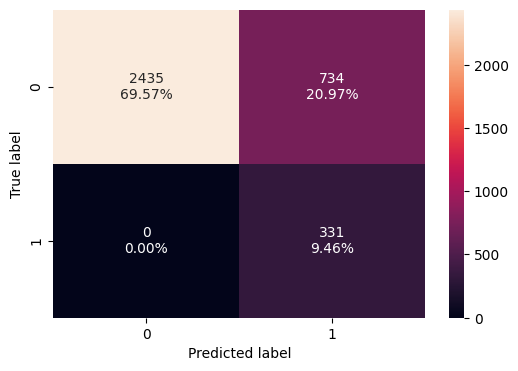

In [52]:
plot_confusion_matrix(tuned_model, X_train, y_train)
df_perf_tuned_train = model_performance_classification(tuned_model,'Tuned','Train', X_train, y_train)
pd.concat([df_perf_default_train,df_perf_default_test, df_perf_tuned_train]).head()

,Model Name,Dataset,Accuracy,Recall,Precision,F1
0,Default,Train,1.000000,1.000000,1.000000,1.000000
0,Default,Test,0.986000,0.932886,0.926667,0.929766
0,Tuned,Train,0.790286,1.000000,0.310798,0.474212
0,Tuned,Test,0.779333,1.000000,0.310417,0.473768


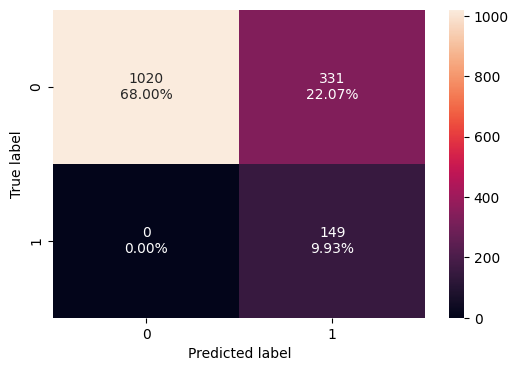

In [53]:
plot_confusion_matrix(tuned_model, X_test, y_test)
df_perf_tuned_test = model_performance_classification(tuned_model,'Tuned','Test', X_test, y_test)
pd.concat([df_perf_default_train,df_perf_default_test, df_perf_tuned_train,df_perf_tuned_test]).head()

#### Visualizing the Decision Tree

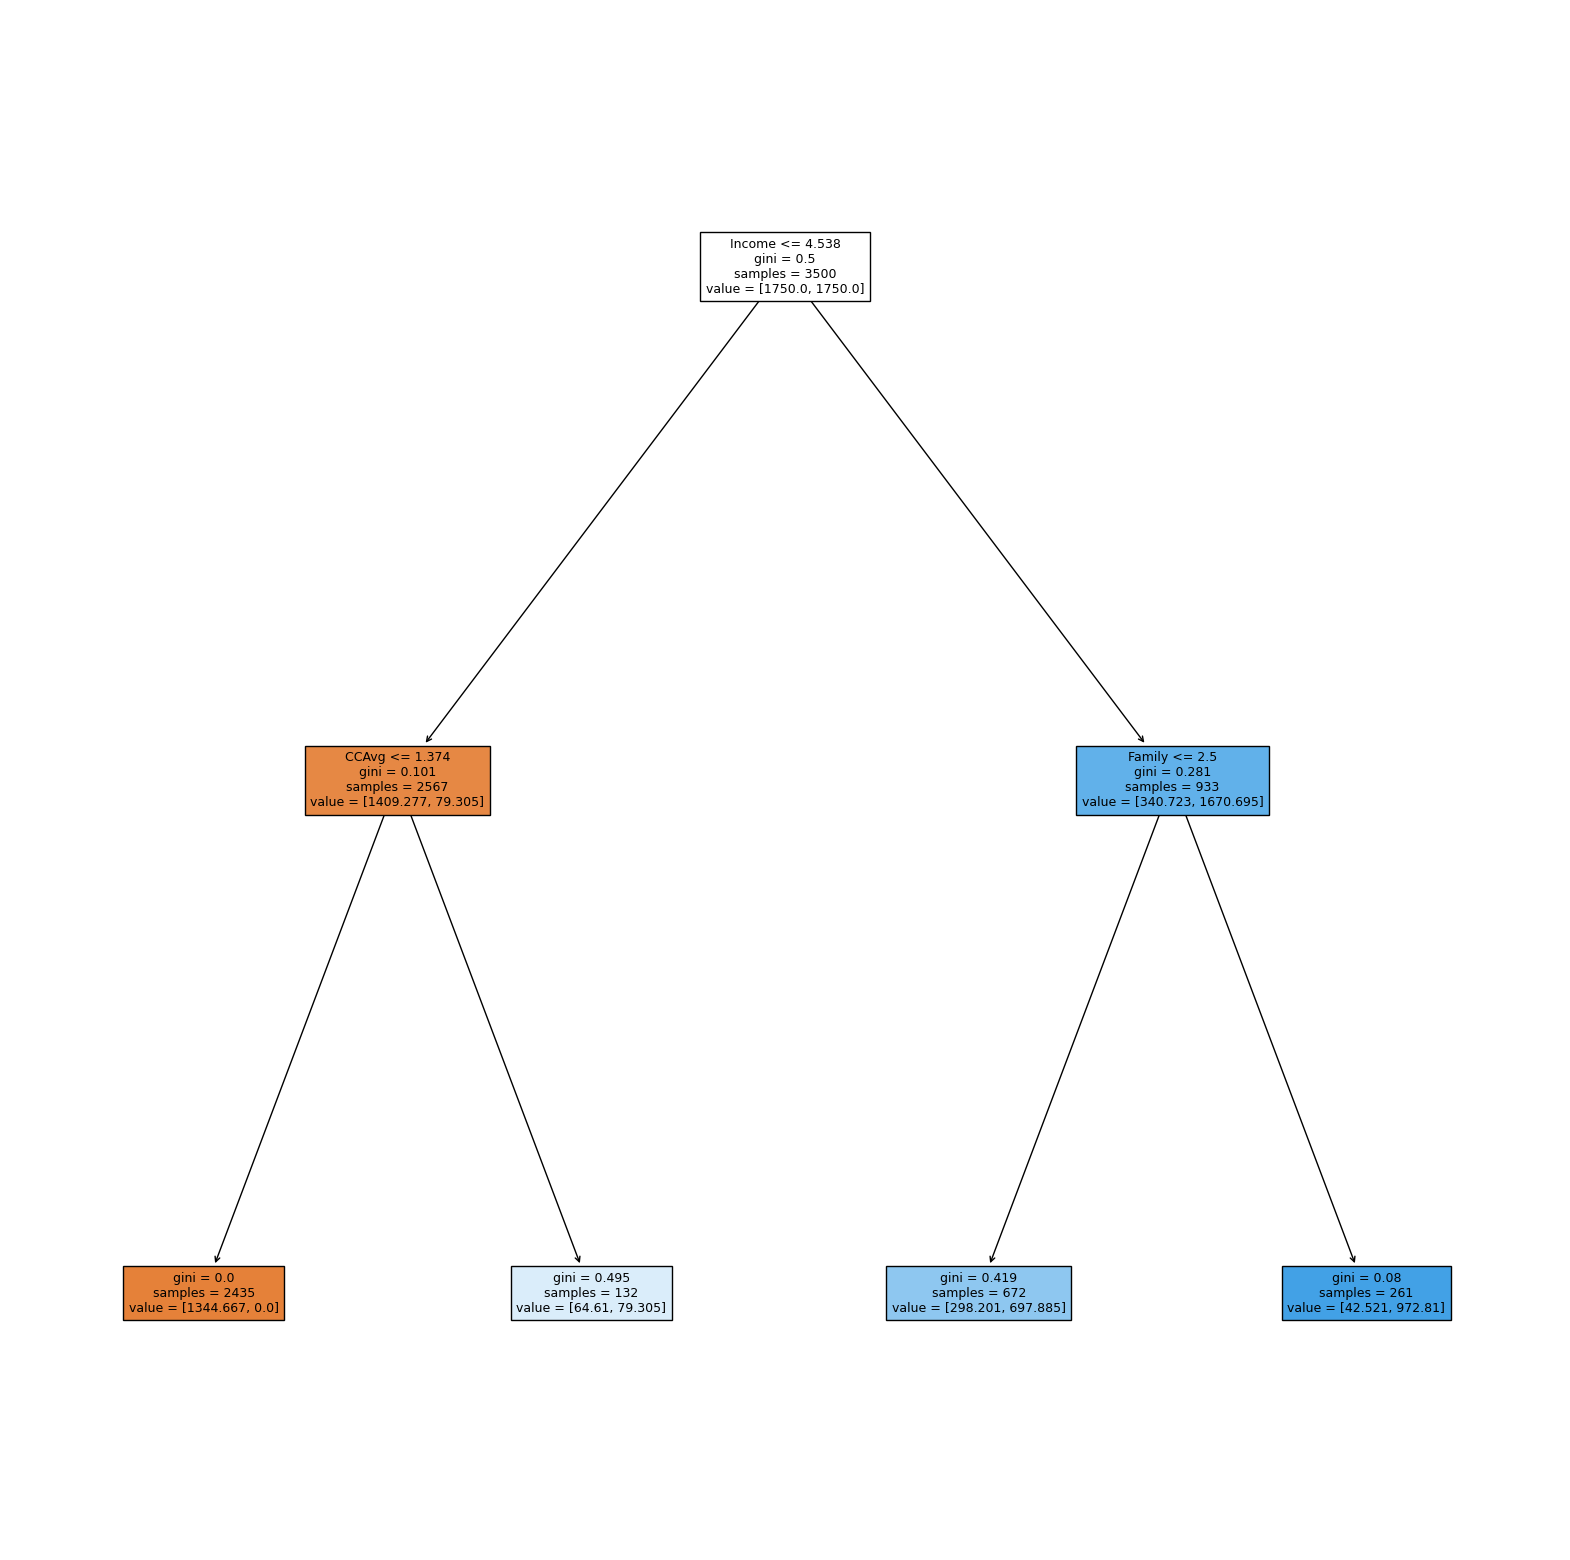

In [54]:

# set the figure size for the plot
plt.figure(figsize=(20, 20))

# plotting the decision tree
out = tree.plot_tree(
    tuned_model,                    # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

* By tuning the hyper parameters, we are able to reduce the complexity of the decision tree.
* This increases the interpretability of the decision.
* The recall value increased, but the F1 score dropped significantly.

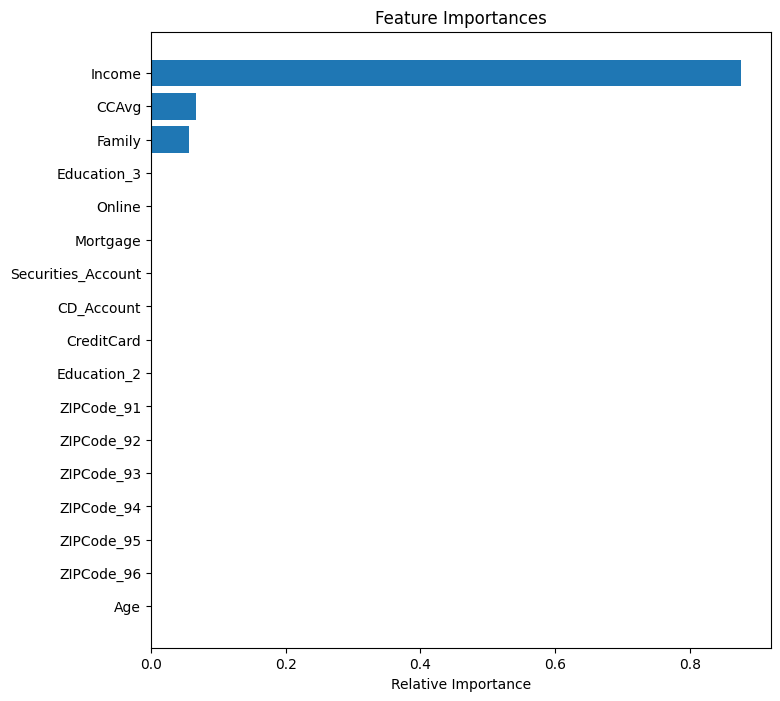

In [55]:
importances = tuned_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Only 3 feautures influence the model.
* `Income`: Annual income of the customer (in thousand dollars)
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)

### Pruning

* Now that we have the results from hyper parameter tuning, lets use the post-pruning technique to prevent overfitting in decision trees.
* Let's focus on getting the best alpha score based on Recall, as the bank is in growth phase and we dont want to miss any potential customers.

In [56]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [57]:
# Train the models based on the effective alphas.
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha, class_weight='balanced')
    clf.fit(X_train, y_train) 
    clfs.append(clf)

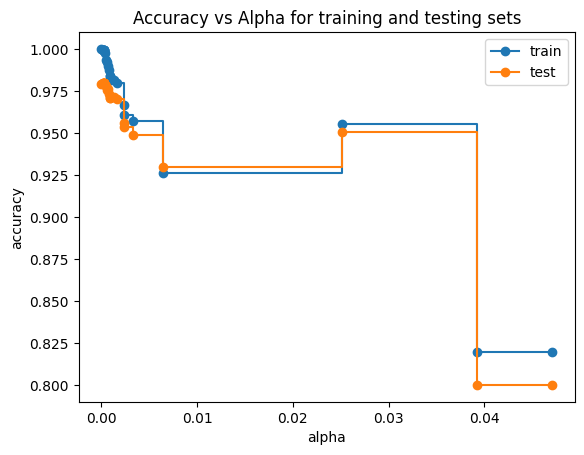

In [58]:
# Get the accuracy score for train and test datasets.
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

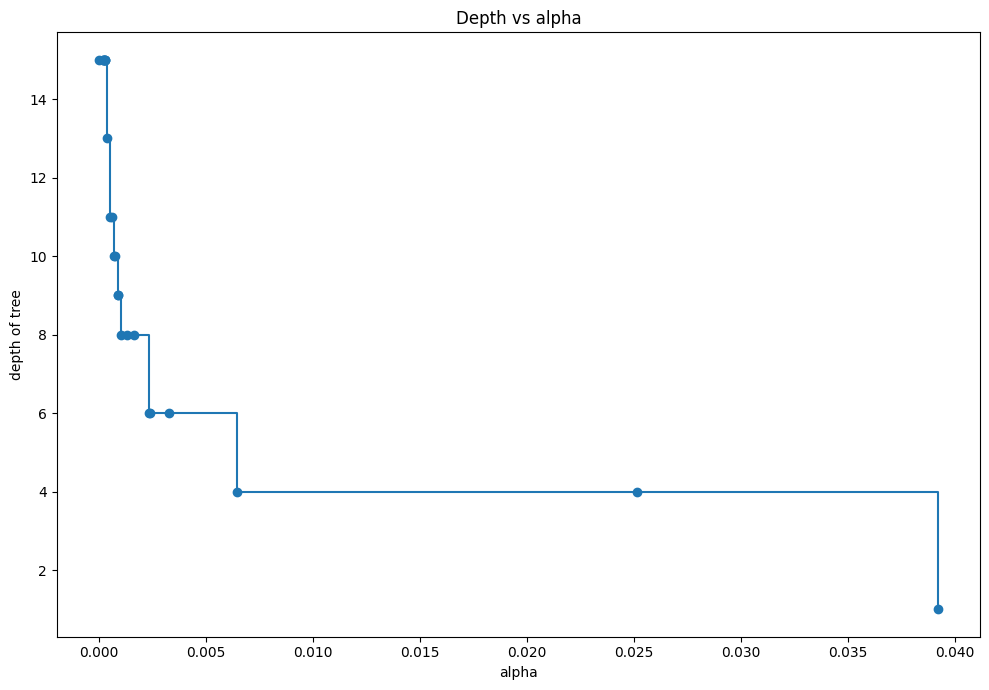

In [59]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax.set_xlabel("alpha")
ax.set_ylabel("depth of tree")
ax.set_title("Depth vs alpha")
fig.tight_layout()

* As the alpha increases, it prunes the tree and the number of levels in the tree is reduced.

In [60]:
# Get the recall scores of train and test datasets
recall_train = []
recall_test = []

for clf in clfs:
    pred_train = clf.predict(X_train)
    pred_test = clf.predict(X_test)

    values_train = recall_score(y_train, pred_train)
    values_test = recall_score(y_test, pred_test)

    recall_train.append(values_train)
    recall_test.append(values_test)

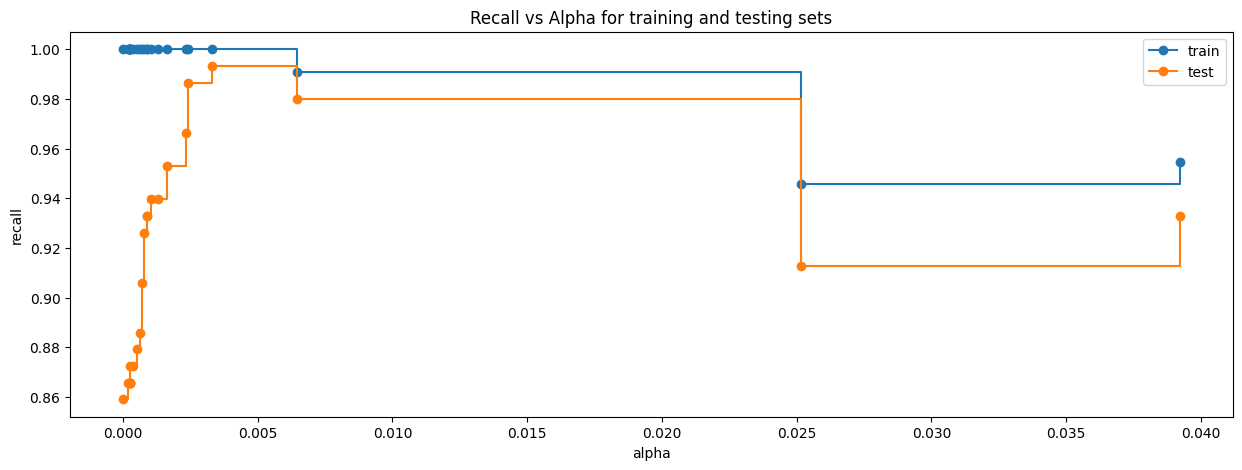

In [61]:
# Plot the recall scors to understand the pattern
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("recall")
ax.set_title("Recall vs Alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

* The recall scrore  is at perfrect "1" for the traninig dataset.
* The scrore gets betters as the alpha increases for the test dataset.

In [62]:
best_alpha = ccp_alphas[np.argmax(recall_test)]
print(f"Best alpha: {best_alpha}")
pruned_model = DecisionTreeClassifier(random_state=1, ccp_alpha=best_alpha, class_weight='balanced')
print(pruned_model)


Best alpha: 0.003293801935470502
DecisionTreeClassifier(ccp_alpha=0.003293801935470502, class_weight='balanced',
                       random_state=1)


,Model Name,Dataset,Accuracy,Recall,Precision,F1
0,Default,Train,1.000000,1.000000,1.000000,1.000000
0,Default,Test,0.986000,0.932886,0.926667,0.929766
0,Tuned,Train,0.790286,1.000000,0.310798,0.474212
0,Tuned,Test,0.779333,1.000000,0.310417,0.473768
0,Pruned,Train,0.956857,1.000000,0.686722,0.814268


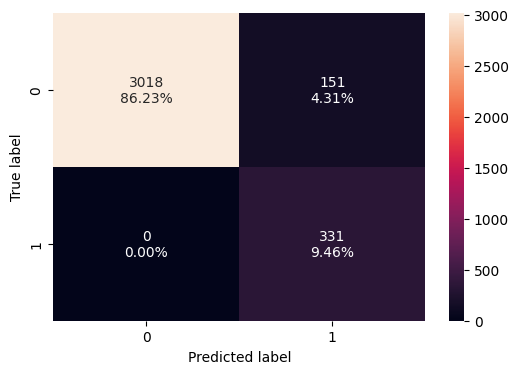

In [63]:
pruned_model.fit(X_train, y_train)


plot_confusion_matrix(pruned_model, X_train, y_train)
df_perf_pruned_train = model_performance_classification(pruned_model,'Pruned','Train', X_train, y_train)
pd.concat([df_perf_default_train,df_perf_default_test, df_perf_tuned_train,df_perf_tuned_test,df_perf_pruned_train]).head()

,Model Name,Dataset,Accuracy,Recall,Precision,F1
0,Default,Train,1.000000,1.000000,1.000000,1.000000
0,Default,Test,0.986000,0.932886,0.926667,0.929766
0,Tuned,Train,0.790286,1.000000,0.310798,0.474212
0,Tuned,Test,0.779333,1.000000,0.310417,0.473768
0,Pruned,Train,0.956857,1.000000,0.686722,0.814268
0,Pruned,Test,0.969333,1.000000,0.764103,0.866279


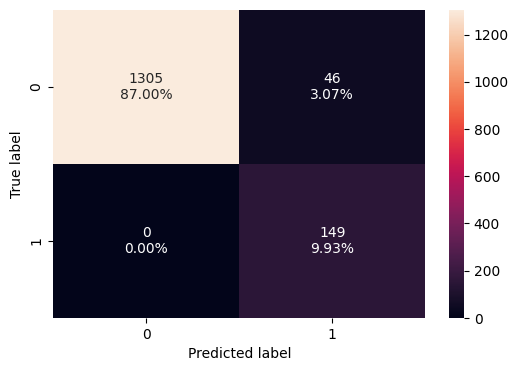

In [64]:
pruned_model.fit(X_test, y_test)


plot_confusion_matrix(pruned_model, X_test, y_test)
df_perf_pruned_test = model_performance_classification(pruned_model,'Pruned','Test', X_test, y_test)
pd.concat([df_perf_default_train,df_perf_default_test, df_perf_tuned_train,df_perf_tuned_test,df_perf_pruned_train,df_perf_pruned_test]).head(10)

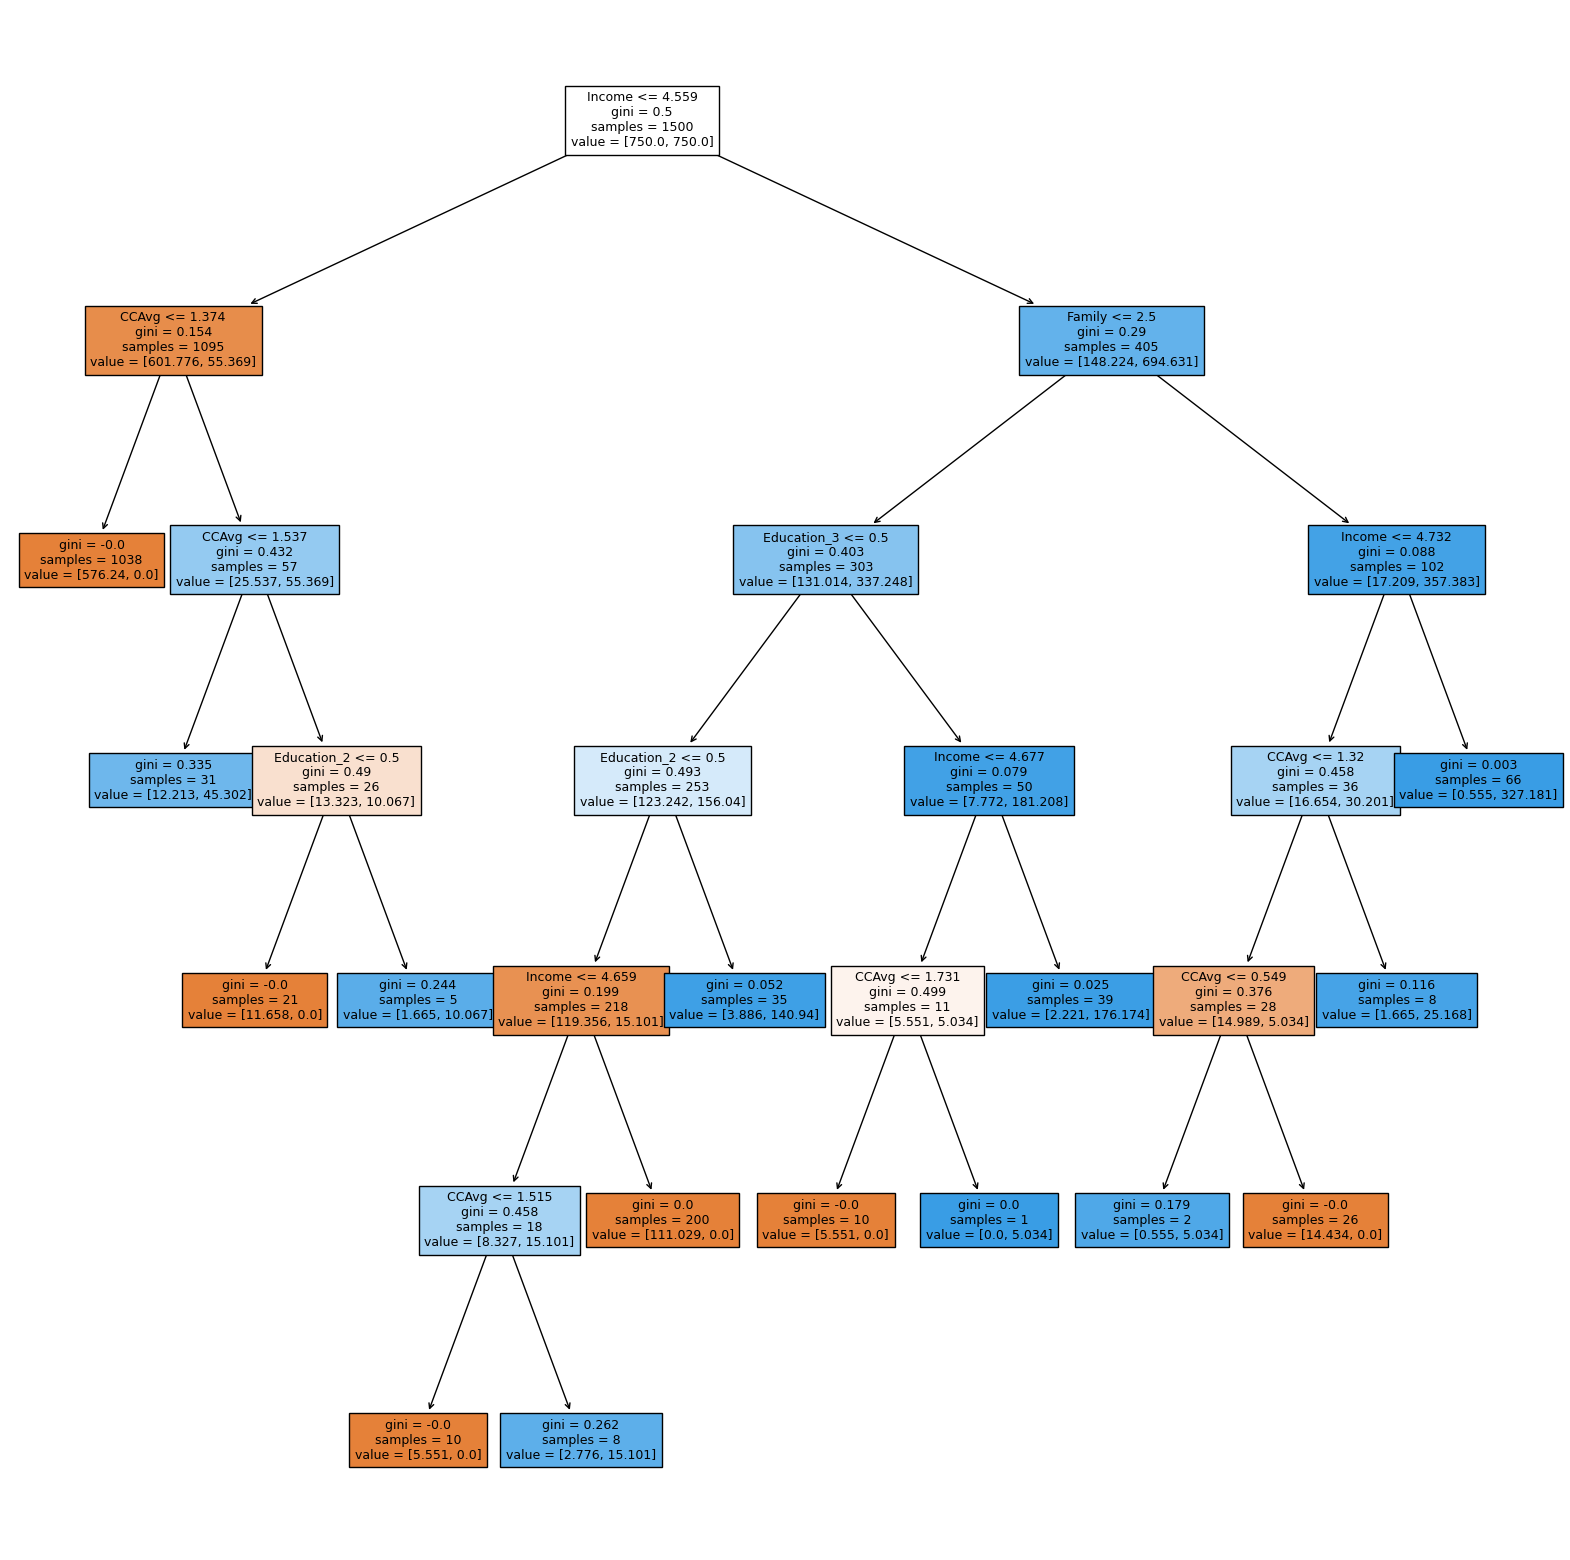

In [65]:

# set the figure size for the plot
plt.figure(figsize=(20, 20))

# plotting the decision tree
out = tree.plot_tree(
    pruned_model,                    # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

* With the Pruned model we see an improvement in the recall score.
* The decision tree still has multiple multiple levels yet not comple has the default model.

## Model Performance Comparison and Final Model Selection

In [66]:
pd.concat([df_perf_default_train,df_perf_default_test, df_perf_tuned_train,df_perf_tuned_test,df_perf_pruned_train,df_perf_pruned_test]).head(10)

,Model Name,Dataset,Accuracy,Recall,Precision,F1
0,Default,Train,1.000000,1.000000,1.000000,1.000000
0,Default,Test,0.986000,0.932886,0.926667,0.929766
0,Tuned,Train,0.790286,1.000000,0.310798,0.474212
0,Tuned,Test,0.779333,1.000000,0.310417,0.473768
0,Pruned,Train,0.956857,1.000000,0.686722,0.814268
0,Pruned,Test,0.969333,1.000000,0.764103,0.866279


* Pruned model appears to be the best pick when considering the F1 score on the test dataset.
* The Pruned model has the highest F1 score (0.937107) on the test dataset, indicating the best balance between precision and recall on unseen data. While the recall is perfect (1.0) for the tuned model, the F1 score is low due to a drop in precision.

* Therefore, the Pruned model appears to be the most suitable choice based on the provided metrics.

## Actionable Insights and Business Recommendations


### What recommedations would you suggest to the bank?

* Monitor Precision:
    While recall is prioritized, it's crucial to monitor precision in a real-world setting. If the precision drops significantly, it could indicate that the model is making too many false positive predictions, which could lead to losses.

* Regularly Retrain the Model:
   The data and customer behavior can change over time. The bank should regularly retrain the model with updated data to ensure its continued accuracy and effectiveness.

* Implement a Threshold Adjustment Strategy:
   The bank should work with the data science team to determine an optimal classification threshold. This threshold can be adjusted to prioritize either precision or recall, depending on the current business priorities. The Precision-Recall curve can be used to inform this decision.

* Consider Cost-Sensitive Learning:
  If the bank has specific cost information associated with false positives (loan defaults) and false negatives (missed loan opportunities), they should consider using cost-sensitive learning techniques to optimize the model for minimizing the overall cost.

* Explainability and Transparency:
   The bank should emphasize the explainability of the model, since we are using a decision tree. This is important for regulatory compliance and for building trust with customers.

By following these recommendations, the bank can effectively use a machine learning model to grow its personal loan business while managing risk and maintaining profitability.

___